### OBJECTIVE: Developing a credit risk default model on companies using their performance data to predict whether a company is going to default on upcoming loan payments.

Businesses or companies can fall prey to default if they are not able to keep up their debt obligations. 
Defaults will lead to a lower credit rating for the company which in turn reduces its chances of getting credit in the future and may have to pay higher intrests on existing debts as well as any new obligations.   

An investor would want to invest in a company if it is capable of handling its financial obligations, can grow quickly, and is able to manage the growth scale.  

Using the Given data from balance sheets of the companies, we will analyse the Financial Risks associated with the companies so as to identify potential defaulters.

    A balance sheet is a financial statement of a company that provides a snapshot of what a company owns, owes, and the amount invested by the shareholders. Thus, it is an important tool that helps evaluate the performance of a business.  
    Data includes information from the financial statement of the companies for the previous year.   

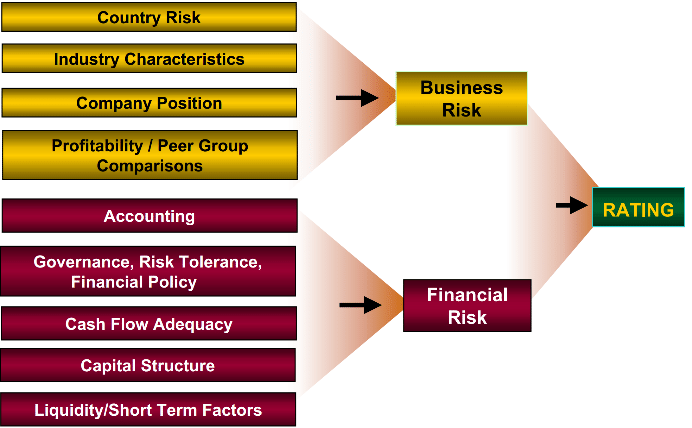  

  

### <span style="background-color: yellow;"><font color="red">Connect in Kaggle and GitHub</font></span>
## KAGGLE Code URL:  
https://www.kaggle.com/rakesh82rawat/code
## GITHUB Repository URL:  
https://github.com/rakesh82rawat?tab=repositories



We start by creating basic linear regression model using  **statsmodels** as the statsmodel provides detailed statistical summaries of the SLR results, including the coefficients, p-values, standard errors, R-squared value, and more. These summaries offer valuable insights into the significance and strength of the relationship between the variables, that helps in filtering out the predictors for the modelling.   
LR can be a valuable initial step in understanding and interpreting the data, especially when statistical insights are crucial.  

However, since your goal is to develop more complex predictive models, we will eventually need to explore other libraries that are better suited for machine learning tasks - such as scikit-learn or TensorFlow/Keras. We will use scikit-learn with Random Forest and LDA models to predict defaulters in the current problem set.


**DATA DICTIONARY for Reference**

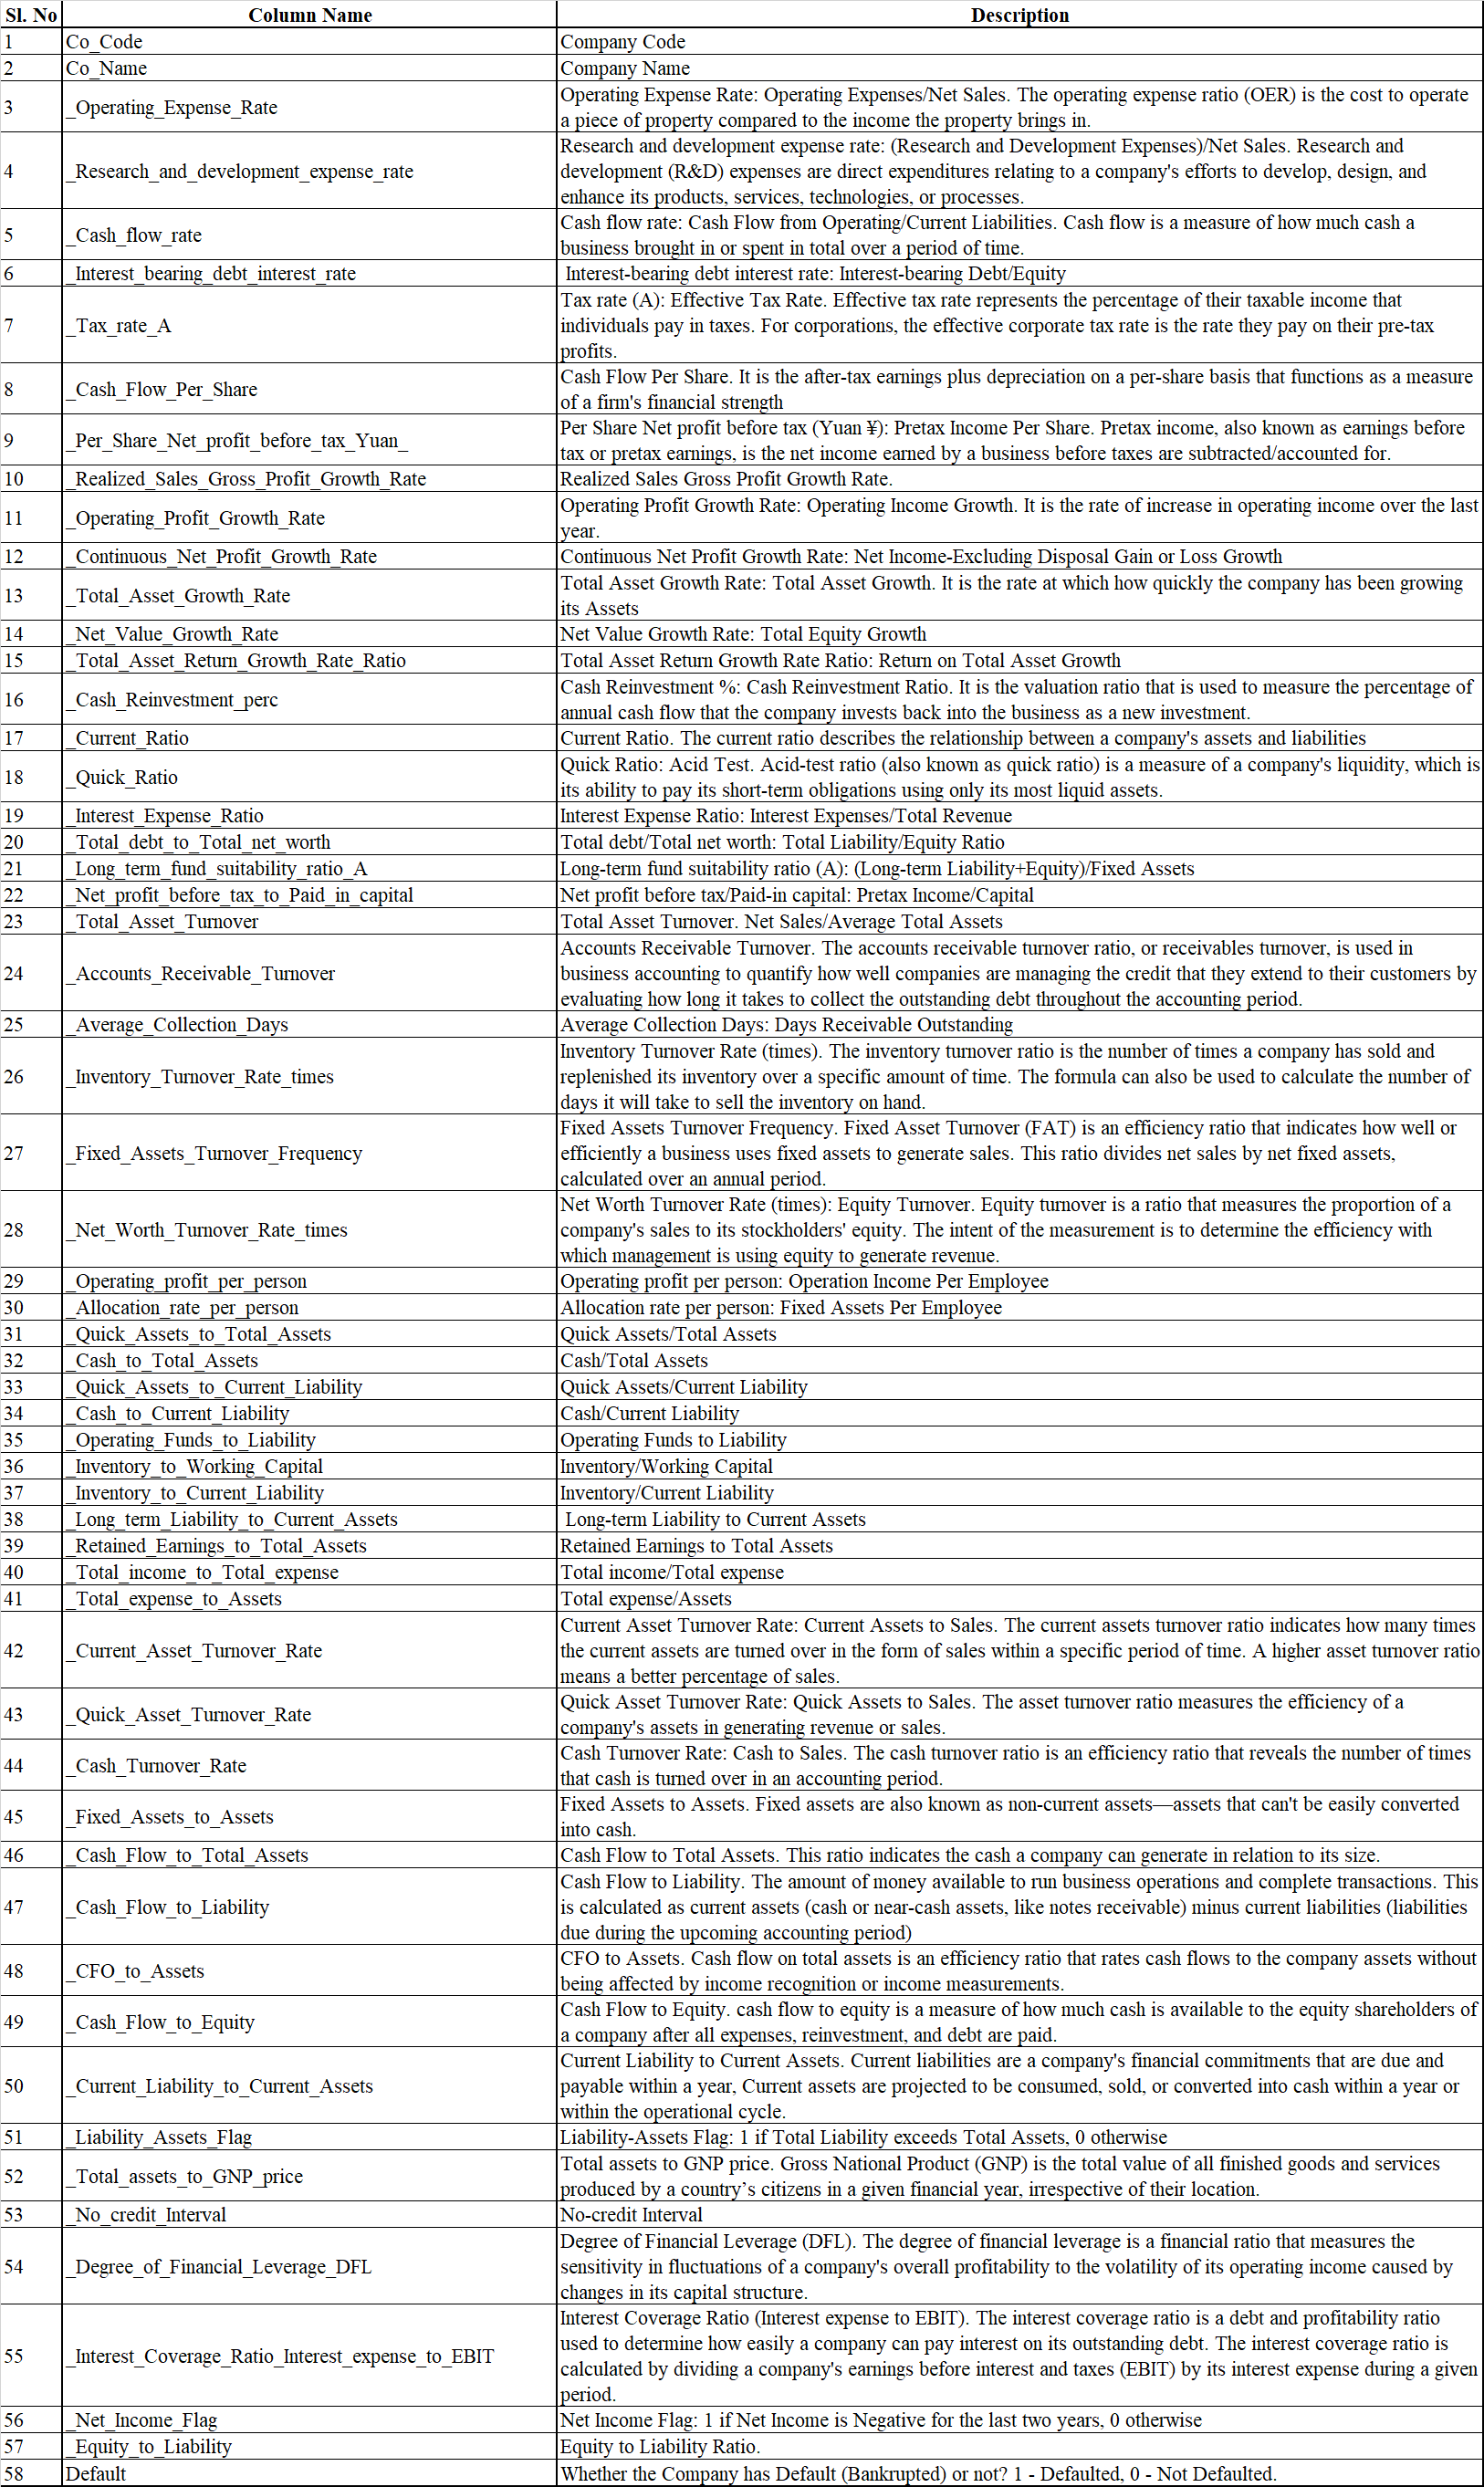

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()

import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [148]:
# IMPORTING DATA

# From local file
Company = pd.read_excel('CompData-1.xlsx')

#Glimpse of Data
Company.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,...,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8820000000.00,0.00,0.46,0.00,0.00,0.32,0.19,0.02,...,0.31,0.03,0,0.03,0.62,0.03,0.57,1,0.02,0
1,21214,Tata Tele. Mah.,9380000000.00,4230000000.00,0.46,0.00,0.00,0.32,0.16,0.02,...,0.31,0.04,0,0.01,0.62,0.03,0.56,1,0.03,1
2,14852,ABG Shipyard,3800000000.00,815000000.00,0.45,0.00,0.00,0.30,0.17,0.02,...,0.31,0.03,0,0.00,0.62,0.03,0.57,1,0.04,0
3,2439,GTL,6440000000.00,0.00,0.46,0.00,0.01,0.32,0.17,0.03,...,0.32,0.02,0,0.00,0.62,0.03,0.57,1,0.03,0
4,23505,Bharati Defence,3680000000.00,0.00,0.46,0.00,0.40,0.33,0.18,0.02,...,0.32,0.03,0,0.01,0.62,0.03,0.57,1,0.02,0


In [3]:
# Checking no. of Rows and Columns
print('The number of rows (observations) is',Company.shape[0],'\n''The number of columns (variables) is',Company.shape[1])

The number of rows (observations) is 2058 
The number of columns (variables) is 58


In [4]:
# Checking datatypes
Company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Co_Code                                            2058 non-null   int64  
 1   Co_Name                                            2058 non-null   object 
 2   _Operating_Expense_Rate                            2058 non-null   float64
 3   _Research_and_development_expense_rate             2058 non-null   float64
 4   _Cash_flow_rate                                    2058 non-null   float64
 5   _Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   _Tax_rate_A                                        2058 non-null   float64
 7   _Cash_Flow_Per_Share                               1891 non-null   float64
 8   _Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   _Realize

In [5]:
# Missing Values check
Company.isna().sum()[Company.isna().sum()>0]

_Cash_Flow_Per_Share                    167
_Total_debt_to_Total_net_worth           21
_Cash_to_Total_Assets                    96
_Current_Liability_to_Current_Assets     14
dtype: int64

In [6]:
display(Company.size), 

display(Company.isnull().sum().sum())

#> 298 Null values found

119364

298

In [7]:
# Proportion of missing values
(298 / 119364)*100

#> missing values = 0.24%  only.

0.249656512851446

In [8]:
#Activating float format for displaying info
pd.options.display.float_format = '{:.1f}'.format

#check the basic measures of descriptive statistics for the continuous variables
Company.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,17572.1,21892.9,4.0,3674.0,6240.0,24280.8,72493.0
_Operating_Expense_Rate,2058.0,2052388835.8,3252623690.3,0.0,0.0,0.0,4110000000.0,9980000000.0
_Research_and_development_expense_rate,2058.0,1208634256.6,2144568158.1,0.0,0.0,0.0,1550000000.0,9980000000.0
_Cash_flow_rate,2058.0,0.5,0.0,0.0,0.5,0.5,0.5,1.0
_Interest_bearing_debt_interest_rate,2058.0,11130223.5,90425949.0,0.0,0.0,0.0,0.0,990000000.0
_Tax_rate_A,2058.0,0.1,0.2,0.0,0.0,0.0,0.2,1.0
_Cash_Flow_Per_Share,1891.0,0.3,0.0,0.2,0.3,0.3,0.3,0.5
_Per_Share_Net_profit_before_tax_Yuan_,2058.0,0.2,0.0,0.0,0.2,0.2,0.2,0.8
_Realized_Sales_Gross_Profit_Growth_Rate,2058.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
_Operating_Profit_Growth_Rate,2058.0,0.8,0.0,0.7,0.8,0.8,0.8,1.0


In [9]:
#Checking "Default" column value distribution (1:Defaulted ; 0:Not defaulted)

display(Company['Default'].value_counts())

pd.options.display.float_format = '{:.2f}'.format
display(Company['Default'].value_counts(normalize = True))

#> 89% Non-defaulter and 11% Defaulter cases found.


0    1838
1     220
Name: Default, dtype: int64

0   0.89
1   0.11
Name: Default, dtype: float64

In [10]:
# SPLITTING DATASET INTO X and Y
Company_X = Company.drop(['Default','Co_Code','Co_Name'], axis = 1)
Company_Y = Company['Default'] 

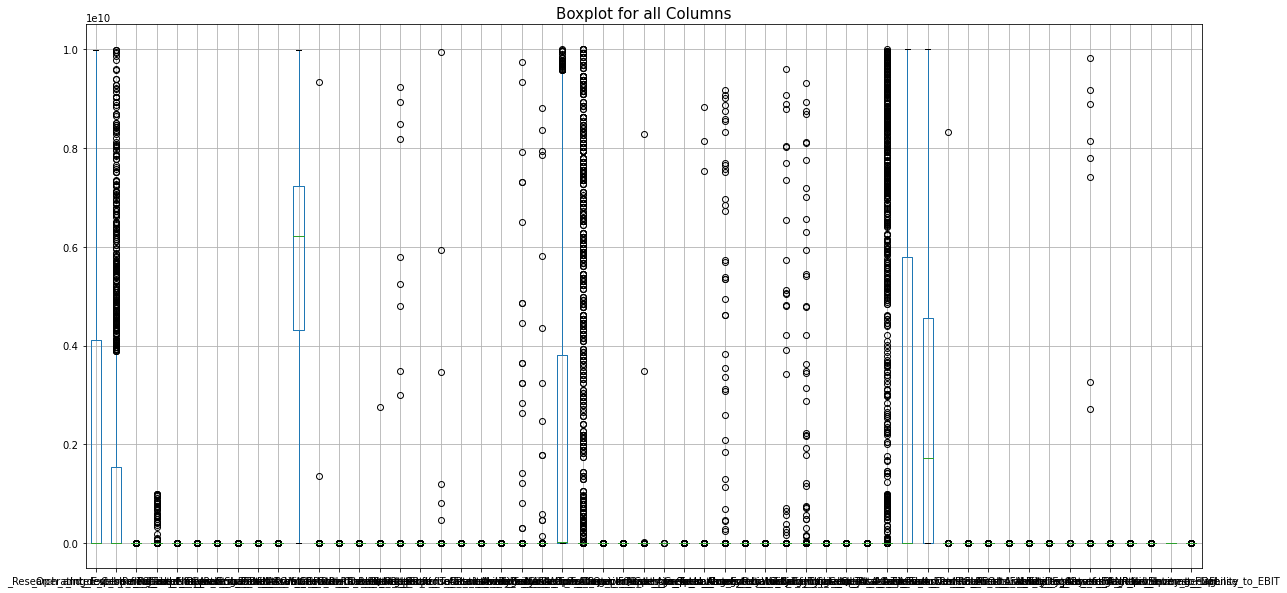

In [11]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot for all Columns",fontsize=15)

Company_X.boxplot();


In [12]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range, upper_range

In [13]:
for column in Company_X.columns:
    lr,ur=remove_outlier(Company_X[column])
    Company_X[column]=np.where(Company_X[column]>ur,ur,Company_X[column])
    Company_X[column]=np.where(Company_X[column]<lr,lr,Company_X[column])

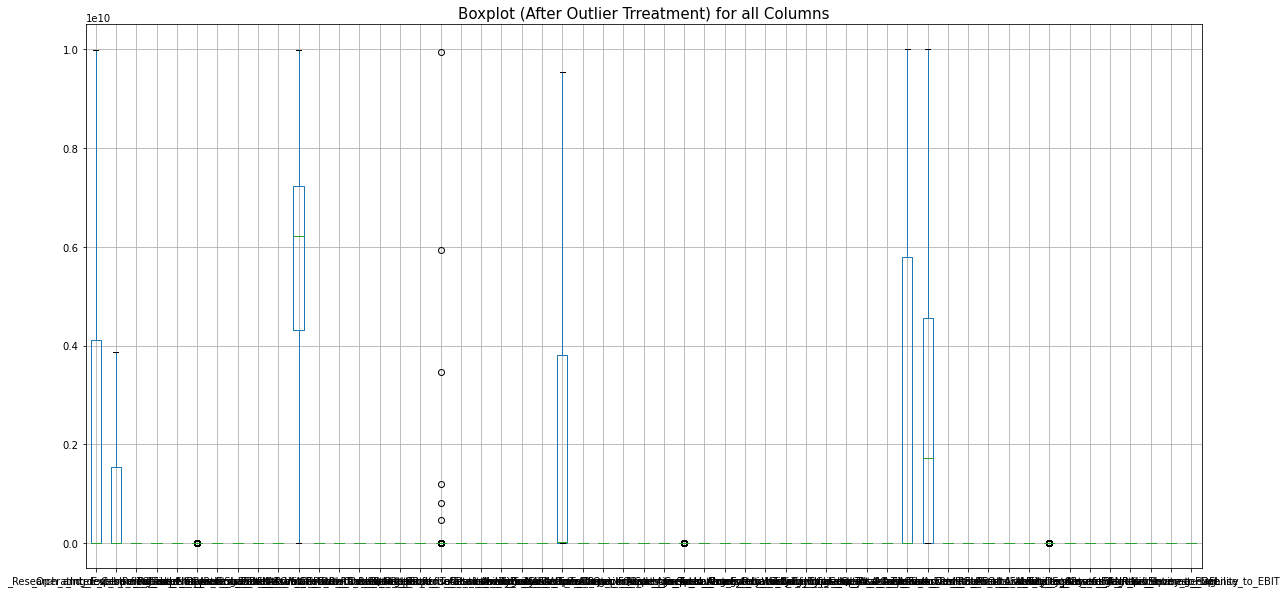

In [14]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot (After Outlier Trreatment) for all Columns",fontsize=15)

Company_X.boxplot();


In [15]:
#Scale the Predictors

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(Company_X), columns = Company_X.columns)

In [16]:
# Concatinating the datasets as Stats Model will be used for model building

Company_XY_sc=pd.concat([scaled_predictors,Company_Y],axis=1)

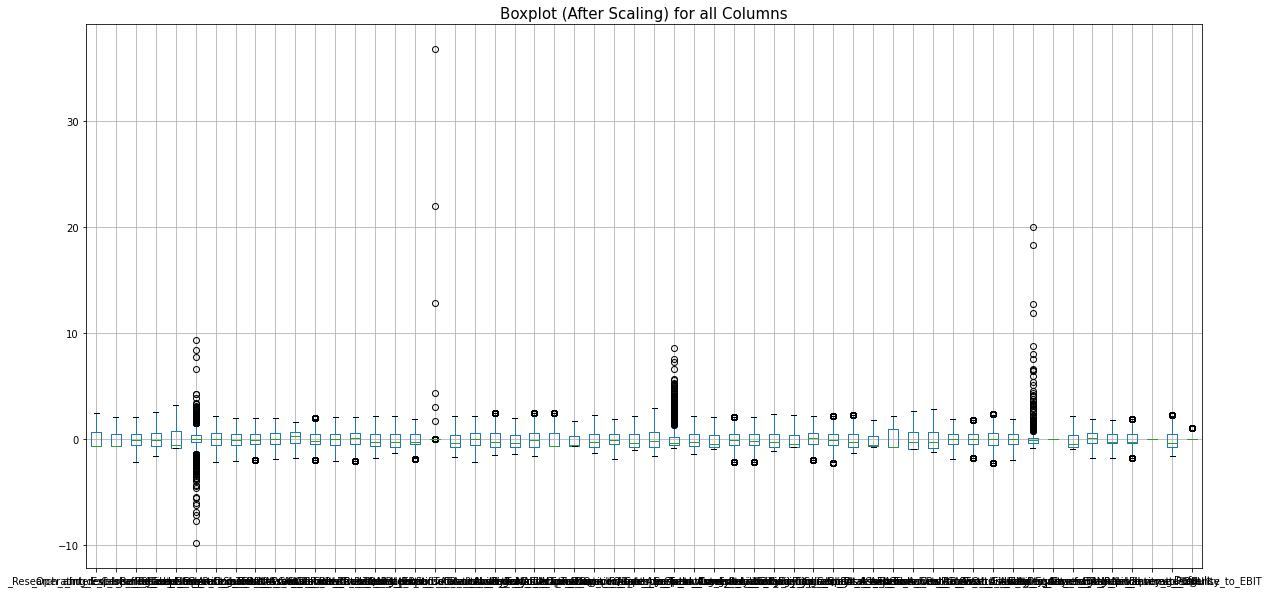

In [17]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
plt.title("Boxplot (After Scaling) for all Columns",fontsize=15)

Company_XY_sc.boxplot();

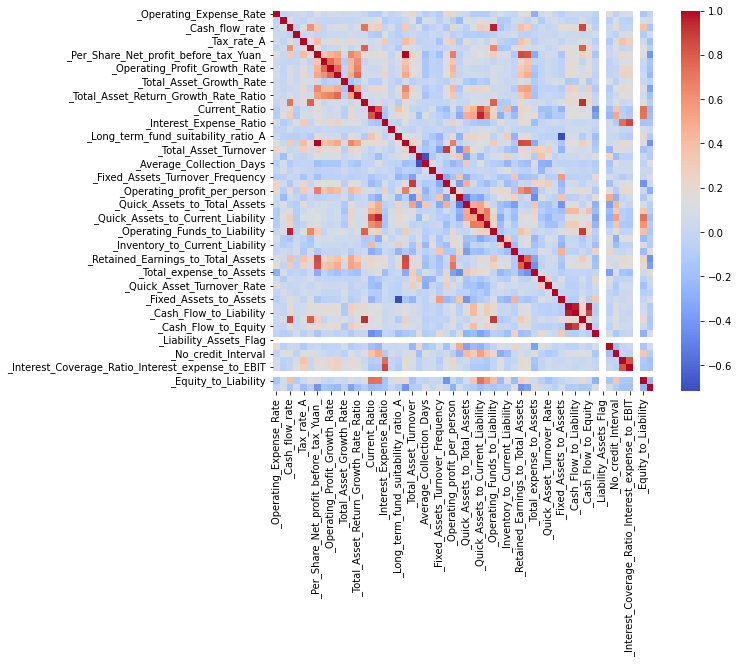

In [18]:
# Calculate col correlations and make a sns heatmap before standardisation

plt.figure(figsize=(10,7))
sns.heatmap(Company_XY_sc.corr(),annot=False,cmap='coolwarm',square=True);

In [19]:
# IMPUTING REMAINING MISSING VALUES

from sklearn.impute import KNNImputer

In [22]:
display(Company_XY_sc.isna().sum()[Company_XY_sc.isna().sum()>0])
display(Company_XY_sc.isna().sum().sum())

#> Total 298 nulls to impute

_Cash_Flow_Per_Share                    167
_Total_debt_to_Total_net_worth           21
_Cash_to_Total_Assets                    96
_Current_Liability_to_Current_Assets     14
dtype: int64

298

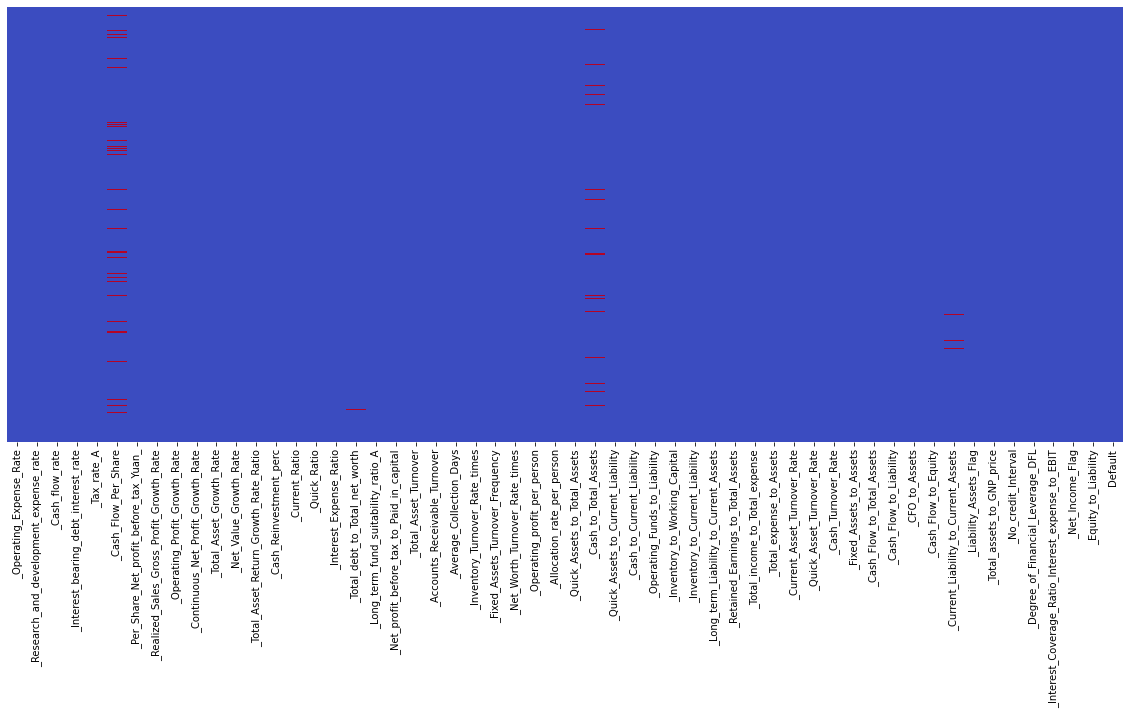

In [20]:
# Visually representing the missing values in the data

plt.figure(figsize = (20,8))
sns.heatmap(Company_XY_sc.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()


In [23]:
# IMPUTING THE MISSING VALUES

from sklearn.impute import KNNImputer

In [24]:
imputer = KNNImputer(n_neighbors=5)

In [25]:
Company_XY_sc_imputed=pd.DataFrame(imputer.fit_transform(Company_XY_sc), columns = Company_XY_sc.columns)

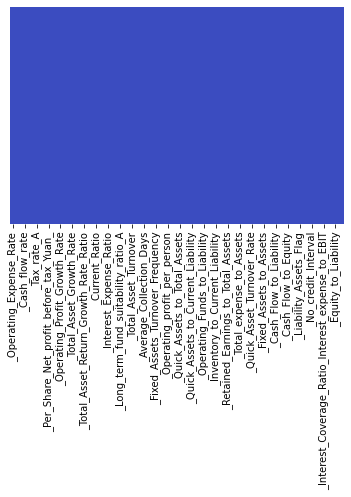

In [26]:
# Visualising missing values in dataset after imputing
sns.heatmap(Company_XY_sc_imputed.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

Finally, we have the dataset with Outliers treated and all missing values imputed. We scaled the predictors as we used the KNN imputer to impute the missing values.

## Model building using Logistic Regression using Stats Model library

#### Linear Regression using statsmodels:
In statsmodels, the linear regression implementation allows you to access detailed statistical information about the model, including p-values, t-tests, and confidence intervals. It is great for statistical analysis and hypothesis testing.

#### Linear Regression using scikit-learn:
In scikit-learn, linear regression is primarily used for predictive modeling, and it focuses on providing a unified interface for all machine learning models, but it doesn't provide the same level of detailed statistical information as statsmodels.  

Hence, to conduct detailed statistical analysis and hypothesis testing related to linear regression, statsmodels is more suitable.   
On the other hand,for building predictive models and using standard machine learning tools, scikit-learn is a better choice.

In [27]:
import statsmodels.formula.api as SM

### Model-1
This will describe the response (Default) using all the independent variables

### VIF

Variance Inflation Factor (VIF) is a measure to detect multicollinearity in multiple regression models.   
It quantifies how much the variance of a regression coefficient is inflated due to correlations with other predictors.  
Variance Inflation Factor tells- How good an independent var can be explaind as a Linear combination of other independent variables (i.e to identify Multicolinearity)  

Use VIF when building a multiple regression model to identify highly correlated variables, which may cause instability and hinder accurate interpretation.   
High VIF values indicate significant multicollinearity, requiring attention, such as removing correlated variables or applying advanced techniques like PCA or regularization to mitigate the issue.  

>In current case (with high no of cols, 56),we must remove the redundent columns to avoid multicolinearity before model building  

>VIF > 5 is not suitable as it is mostly compensated by other IVs.   
Hence we use VIF to clean the data of redundent vars.

In [28]:
# Checking all columns in the dataset

display(Company_XY_sc_imputed.columns.value_counts().sum()) # #cols.
display(Company_XY_sc_imputed.columns)


56

Index(['_Operating_Expense_Rate', '_Research_and_development_expense_rate',
       '_Cash_flow_rate', '_Interest_bearing_debt_interest_rate',
       '_Tax_rate_A', '_Cash_Flow_Per_Share',
       '_Per_Share_Net_profit_before_tax_Yuan_',
       '_Realized_Sales_Gross_Profit_Growth_Rate',
       '_Operating_Profit_Growth_Rate', '_Continuous_Net_Profit_Growth_Rate',
       '_Total_Asset_Growth_Rate', '_Net_Value_Growth_Rate',
       '_Total_Asset_Return_Growth_Rate_Ratio', '_Cash_Reinvestment_perc',
       '_Current_Ratio', '_Quick_Ratio', '_Interest_Expense_Ratio',
       '_Total_debt_to_Total_net_worth', '_Long_term_fund_suitability_ratio_A',
       '_Net_profit_before_tax_to_Paid_in_capital', '_Total_Asset_Turnover',
       '_Accounts_Receivable_Turnover', '_Average_Collection_Days',
       '_Inventory_Turnover_Rate_times', '_Fixed_Assets_Turnover_Frequency',
       '_Net_Worth_Turnover_Rate_times', '_Operating_profit_per_person',
       '_Allocation_rate_per_person', '_Quick_Assets_to

In [29]:
# Checking VARIANCE INFLATION FOCTOR in Predictors for adressing Multicolinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    #calculating VIF
    vif=pd.DataFrame()
    vif["variables"]=X.columns
    vif["VIF"]=[variance_inflation_factor(X.values, i)for i in range (X.shape[1])]
    return(vif)


In [31]:
X = Company_XY_sc_imputed.drop('Default', axis=1)  # dropping the response col.
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
6,_Per_Share_Net_profit_before_tax_Yuan_,98.99
19,_Net_profit_before_tax_to_Paid_in_capital,98.75
43,_Cash_Flow_to_Total_Assets,44.45
45,_CFO_to_Assets,28.30
32,_Operating_Funds_to_Liability,21.22
30,_Quick_Assets_to_Current_Liability,19.90
44,_Cash_Flow_to_Liability,17.86
2,_Cash_flow_rate,16.60
46,_Cash_Flow_to_Equity,15.13
15,_Quick_Ratio,12.45


In [32]:
# Dropping (*one by one) the highest VIF variable and recalculating VIF

X = X.drop('_Per_Share_Net_profit_before_tax_Yuan_', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
42,_Cash_Flow_to_Total_Assets,44.42
44,_CFO_to_Assets,28.24
31,_Operating_Funds_to_Liability,21.21
29,_Quick_Assets_to_Current_Liability,19.89
43,_Cash_Flow_to_Liability,17.86
2,_Cash_flow_rate,16.60
45,_Cash_Flow_to_Equity,15.09
14,_Quick_Ratio,12.45
12,_Cash_Reinvestment_perc,12.30
13,_Current_Ratio,11.00


In [33]:
X = X.drop('_Cash_Flow_to_Total_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
43,_CFO_to_Assets,28.02
31,_Operating_Funds_to_Liability,21.19
29,_Quick_Assets_to_Current_Liability,19.86
2,_Cash_flow_rate,16.57
14,_Quick_Ratio,12.43
12,_Cash_Reinvestment_perc,12.07
13,_Current_Ratio,11.00
19,_Total_Asset_Turnover,10.93
24,_Net_Worth_Turnover_Rate_times,10.57
18,_Net_profit_before_tax_to_Paid_in_capital,8.24


In [34]:
X = X.drop('_CFO_to_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
29,_Quick_Assets_to_Current_Liability,19.86
31,_Operating_Funds_to_Liability,18.87
2,_Cash_flow_rate,15.98
14,_Quick_Ratio,12.42
13,_Current_Ratio,10.99
19,_Total_Asset_Turnover,10.90
24,_Net_Worth_Turnover_Rate_times,10.52
18,_Net_profit_before_tax_to_Paid_in_capital,7.97
27,_Quick_Assets_to_Total_Assets,6.36
49,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.06


In [35]:
X = X.drop('_Quick_Assets_to_Current_Liability', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
30,_Operating_Funds_to_Liability,18.67
2,_Cash_flow_rate,15.74
19,_Total_Asset_Turnover,10.89
24,_Net_Worth_Turnover_Rate_times,10.52
13,_Current_Ratio,8.49
18,_Net_profit_before_tax_to_Paid_in_capital,7.94
14,_Quick_Ratio,7.89
48,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.06
27,_Quick_Assets_to_Total_Assets,5.62
35,_Total_income_to_Total_expense,5.19


In [36]:
X = X.drop('_Operating_Funds_to_Liability', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
19,_Total_Asset_Turnover,10.83
24,_Net_Worth_Turnover_Rate_times,10.49
13,_Current_Ratio,8.27
18,_Net_profit_before_tax_to_Paid_in_capital,7.90
14,_Quick_Ratio,7.79
47,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.05
27,_Quick_Assets_to_Total_Assets,5.53
33,_Retained_Earnings_to_Total_Assets,5.14
34,_Total_income_to_Total_expense,5.13
41,_Cash_Flow_to_Equity,5.10


In [37]:
X = X.drop('_Total_Asset_Turnover', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
13,_Current_Ratio,8.26
18,_Net_profit_before_tax_to_Paid_in_capital,7.89
14,_Quick_Ratio,7.77
46,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.04
26,_Quick_Assets_to_Total_Assets,5.46
33,_Total_income_to_Total_expense,5.11
40,_Cash_Flow_to_Equity,5.10
32,_Retained_Earnings_to_Total_Assets,5.01
39,_Cash_Flow_to_Liability,4.96
38,_Fixed_Assets_to_Assets,4.73


In [38]:
X = X.drop('_Current_Ratio', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
17,_Net_profit_before_tax_to_Paid_in_capital,7.87
45,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,6.02
25,_Quick_Assets_to_Total_Assets,5.40
13,_Quick_Ratio,5.20
32,_Total_income_to_Total_expense,5.11
39,_Cash_Flow_to_Equity,5.10
31,_Retained_Earnings_to_Total_Assets,5.01
38,_Cash_Flow_to_Liability,4.95
37,_Fixed_Assets_to_Assets,4.72
14,_Interest_Expense_Ratio,4.51


In [39]:
X = X.drop('_Net_profit_before_tax_to_Paid_in_capital', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
44,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,5.98
24,_Quick_Assets_to_Total_Assets,5.39
13,_Quick_Ratio,5.19
38,_Cash_Flow_to_Equity,5.07
37,_Cash_Flow_to_Liability,4.91
36,_Fixed_Assets_to_Assets,4.71
14,_Interest_Expense_Ratio,4.44
31,_Total_income_to_Total_expense,4.30
46,_Equity_to_Liability,4.04
12,_Cash_Reinvestment_perc,3.91


In [40]:
X = X.drop('_Interest_Coverage_Ratio_Interest_expense_to_EBIT', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
24,_Quick_Assets_to_Total_Assets,5.39
13,_Quick_Ratio,5.19
38,_Cash_Flow_to_Equity,5.07
37,_Cash_Flow_to_Liability,4.91
36,_Fixed_Assets_to_Assets,4.71
31,_Total_income_to_Total_expense,4.30
45,_Equity_to_Liability,4.03
12,_Cash_Reinvestment_perc,3.91
7,_Operating_Profit_Growth_Rate,3.62
30,_Retained_Earnings_to_Total_Assets,3.58


In [41]:
X = X.drop('_Quick_Assets_to_Total_Assets', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

,variables,VIF
37,_Cash_Flow_to_Equity,5.07
36,_Cash_Flow_to_Liability,4.90
35,_Fixed_Assets_to_Assets,4.43
30,_Total_income_to_Total_expense,4.25
13,_Quick_Ratio,4.17
12,_Cash_Reinvestment_perc,3.91
44,_Equity_to_Liability,3.90
7,_Operating_Profit_Growth_Rate,3.62
29,_Retained_Earnings_to_Total_Assets,3.58
2,_Cash_flow_rate,3.47


In [42]:
X = X.drop('_Cash_Flow_to_Equity', axis=1)
calc_vif(X).sort_values(by = 'VIF',ascending = False)

#> Now all variables have VIF <5

,variables,VIF
35,_Fixed_Assets_to_Assets,4.43
30,_Total_income_to_Total_expense,4.25
13,_Quick_Ratio,4.17
43,_Equity_to_Liability,3.89
12,_Cash_Reinvestment_perc,3.88
7,_Operating_Profit_Growth_Rate,3.61
29,_Retained_Earnings_to_Total_Assets,3.58
2,_Cash_flow_rate,3.47
8,_Continuous_Net_Profit_Growth_Rate,3.44
25,_Cash_to_Current_Liability,3.35


In [43]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
_Operating_Expense_Rate,2058.00,0.00,1.00,-0.63,-0.63,-0.63,0.63,2.44
_Research_and_development_expense_rate,2058.00,0.00,1.00,-0.65,-0.65,-0.65,0.43,2.04
_Cash_flow_rate,2058.00,0.00,1.00,-2.18,-0.58,-0.13,0.49,2.09
_Interest_bearing_debt_interest_rate,2058.00,0.00,1.00,-1.63,-0.70,-0.10,0.60,2.56
_Tax_rate_A,2058.00,-0.00,1.00,-0.82,-0.82,-0.54,0.78,3.19
_Cash_Flow_Per_Share,2058.00,-0.00,0.97,-9.84,-0.32,0.05,0.37,9.30
_Realized_Sales_Gross_Profit_Growth_Rate,2058.00,-0.00,1.00,-2.05,-0.55,-0.10,0.45,1.96
_Operating_Profit_Growth_Rate,2058.00,-0.00,1.00,-1.98,-0.50,-0.05,0.48,1.96
_Continuous_Net_Profit_Growth_Rate,2058.00,0.00,1.00,-1.91,-0.45,0.01,0.52,1.98
_Total_Asset_Growth_Rate,2058.00,0.00,1.00,-1.82,-0.33,0.32,0.66,1.61


In [44]:
#Dropping other columns having only one type of values and hence not significant 

X=X.drop(['_Liability_Assets_Flag','_Net_Income_Flag'],axis=1)

## MODELING

### Base model using Linear Regression

In [45]:
# DATA PREPARATION FOR MODELING

# Train Test Split
y= Company_XY_sc_imputed['Default']

In [46]:
# X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.33, random_state=42)

In [47]:
# Bringing together X and y as its required for the Statsmodel
train_XY = pd.concat([X_train,y_train], axis=1)
test_XY = pd.concat([X_test,y_test], axis=1)

### Model-1 (Stats Model)

In [49]:
#Defining the function (f_1) for the Model-1 using all the filtered columns
f_1= 'Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Cash_flow_rate+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Realized_Sales_Gross_Profit_Growth_Rate+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Interest_Expense_Ratio+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_No_credit_Interval+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate+_Total_debt_to_Total_net_worth'

In [50]:
# Fitting Model1
model_1=SM.logit(formula=f_1, data=test_XY).fit()

         Current function value: 0.158800
         Iterations: 35


C:\Users\user\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
# model1 summary
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                  680
Model:                          Logit   Df Residuals:                      637
Method:                           MLE   Df Model:                           42
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.5066
Time:                        06:58:04   Log-Likelihood:                -107.98
converged:                      False   LL-Null:                       -218.85
Covariance Type:            nonrobust   LLR p-value:                 2.795e-26
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -5.1162   2.53e+05  -2.02e-05      1.000   -4.95e+05    4.95e+05
_Fixed_Assets_to_Assets                      0.3733      0.423      0.882      0.378      -0.456       1.203
_Total_income_to_Total_expense              -0.0222      0.560     -0.040      0.968      -1.120       1.076
_Quick_Ratio                                 0.1873      0.531      0.353      0.724      -0.853       1.228
_Equity_to_Liability                        -2.6631      0.711     -3.747      0.000      -4.056      -1.270
_Cash_Reinvestment_perc                      0.5836      0.437      1.335      0.182      -0.273       1.440
_Operating_Profit_Growth_Rate                0.3062      0.301      1.016      0.310      -0.285       0.897
_Retained_Earnings_to_Total_Assets          -1.0912      0.395     -2.762      0.006      -1.866      -0.317
_Cash_flow_rate                             -0.2540      0.463     -0.549      0.583      -1.161       0.653
_Continuous_Net_Profit_Growth_Rate          -0.8373      0.330     -2.539      0.011      -1.484      -0.191
_Cash_to_Current_Liability                   0.0289      0.355      0.082      0.935      -0.666       0.724
_Total_Asset_Return_Growth_Rate_Ratio        0.2773      0.286      0.969      0.333      -0.284       0.838
_Operating_profit_per_person                -0.2634      0.344     -0.765      0.444      -0.939       0.412
_Long_term_fund_suitability_ratio_A          0.6785      0.348      1.950      0.051      -0.003       1.360
_Net_Worth_Turnover_Rate_times              -0.3323      0.316     -1.051      0.293      -0.952       0.287
_Realized_Sales_Gross_Profit_Growth_Rate     0.0020      0.253      0.008      0.994      -0.494       0.498
_Cash_Flow_Per_Share                        -0.4443      0.577     -0.771      0.441      -1.574       0.686
_Allocation_rate_per_person                  0.0022      0.318      0.007      0.995      -0.620       0.625
_Cash_to_Total_Assets                        0.2891      0.438      0.660      0.509      -0.570       1.148
_Accounts_Receivable_Turnover               -0.7843      0.378     -2.073      0.038      -1.526      -0.043
_Degree_of_Financial_Leverage_DFL            0.3312      0.264      1.256      0.209      -0.186       0.848
_Interest_Expense_Ratio                     -0.0144      0.243     -0.059      0.953      -0.491       0.462
_Average_Collection_Days                    -0.0225      0.354     -0.063      0.949      -0.716       0.671
_Net_Value_Growth_Rate                      -0.4935      0.241     -2.045      0.041      -0.967      -0.020
_Total_expense_to_Assets                     0.3321      0.283      1.172      0.241      -0.223       0.887
_Fixed_Assets_Turnover_Frequency             0.1122      0.270      0.416      0.677      -0.416       0.641
_Inventory_to_Current_Liability              0.0705      0.280      0.252      0

**"quasi-separation"** occurs when certain predictor values perfectly predict the outcome variable, leading to distinct groups in the data. "Complete quasi-separation" means all observations can be perfectly predicted. This can cause problems with parameter estimation, as multiple parameter values may fit the data equally well, making identification challenging.  
Addressing this issue may require regularization techniques or model simplification.

* We observe many features having p-value > 0.05. 
* These features must be removed as they are not statistically significant in the current case.

##### Removing the features, one at a time (starting with highest p-value) and checking the result after each step

In [52]:
# removing _Total_debt_to_Total_net_worth having p=1
model_2=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Cash_flow_rate+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Realized_Sales_Gross_Profit_Growth_Rate+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Interest_Expense_Ratio+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_No_credit_Interval+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()

Optimization terminated successfully.
         Current function value: 0.187694
         Iterations 9


In [53]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1336
Method:                           MLE   Df Model:                           41
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4617
Time:                        06:58:04   Log-Likelihood:                -258.64
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 5.249e-69
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.2347      0.294    -14.388      0.000      -4.811      -3.658
_Fixed_Assets_to_Assets                      0.1171      0.227      0.516      0.606      -0.328       0.562
_Total_income_to_Total_expense              -0.8734      0.333     -2.619      0.009      -1.527      -0.220
_Quick_Ratio                                -1.1188      0.306     -3.654      0.000      -1.719      -0.519
_Equity_to_Liability                        -0.8923      0.355     -2.515      0.012      -1.588      -0.197
_Cash_Reinvestment_perc                     -0.4842      0.224     -2.163      0.031      -0.923      -0.045
_Operating_Profit_Growth_Rate                0.1189      0.187      0.635      0.525      -0.248       0.486
_Retained_Earnings_to_Total_Assets          -0.7871      0.249     -3.164      0.002      -1.275      -0.300
_Cash_flow_rate                              0.0075      0.305      0.025      0.980      -0.590       0.606
_Continuous_Net_Profit_Growth_Rate          -0.2745      0.203     -1.352      0.176      -0.673       0.124
_Cash_to_Current_Liability                   0.2967      0.195      1.525      0.127      -0.085       0.678
_Total_Asset_Return_Growth_Rate_Ratio        0.3247      0.198      1.639      0.101      -0.064       0.713
_Operating_profit_per_person                 0.5279      0.205      2.579      0.010       0.127       0.929
_Long_term_fund_suitability_ratio_A          0.2172      0.191      1.139      0.255      -0.156       0.591
_Net_Worth_Turnover_Rate_times               0.2485      0.192      1.298      0.194      -0.127       0.624
_Realized_Sales_Gross_Profit_Growth_Rate    -0.0435      0.156     -0.278      0.781      -0.350       0.263
_Cash_Flow_Per_Share                         0.2228      0.254      0.878      0.380      -0.275       0.720
_Allocation_rate_per_person                  0.6753      0.196      3.440      0.001       0.291       1.060
_Cash_to_Total_Assets                       -0.0758      0.258     -0.294      0.769      -0.582       0.430
_Accounts_Receivable_Turnover               -0.4935      0.192     -2.572      0.010      -0.870      -0.117
_Degree_of_Financial_Leverage_DFL            0.0461      0.154      0.299      0.765      -0.256       0.348
_Interest_Expense_Ratio                      0.0182      0.144      0.126      0.900      -0.265       0.301
_Average_Collection_Days                     0.1950      0.168      1.162      0.245      -0.134       0.524
_Net_Value_Growth_Rate                      -0.4337      0.197     -2.204      0.028      -0.819      -0.048
_Total_expense_to_Assets                     0.3875      0.186      2.083      0.037       0.023       0.752
_Fixed_Assets_Turnover_Frequency             0.2146      0.152      1.414      0.157      -0.083       0.512
_Inventory_to_Current_Liability             -0.0864      0.199     -0.434      0

In [54]:
# Removing _Cash_flow_rate
mode3=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Realized_Sales_Gross_Profit_Growth_Rate+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Interest_Expense_Ratio+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_No_credit_Interval+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode3.summary()

Optimization terminated successfully.
         Current function value: 0.187695
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1337
Method:                           MLE   Df Model:                           40
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4617
Time:                        06:58:05   Log-Likelihood:                -258.64
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.563e-69
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.2357      0.291    -14.549      0.000      -4.806      -3.665
_Fixed_Assets_to_Assets                      0.1177      0.226      0.522      0.602      -0.325       0.560
_Total_income_to_Total_expense              -0.8721      0.330     -2.647      0.008      -1.518      -0.226
_Quick_Ratio                                -1.1187      0.306     -3.653      0.000      -1.719      -0.519
_Equity_to_Liability                        -0.8921      0.355     -2.515      0.012      -1.587      -0.197
_Cash_Reinvestment_perc                     -0.4813      0.191     -2.525      0.012      -0.855      -0.108
_Operating_Profit_Growth_Rate                0.1191      0.187      0.637      0.524      -0.247       0.485
_Retained_Earnings_to_Total_Assets          -0.7864      0.247     -3.183      0.001      -1.271      -0.302
_Continuous_Net_Profit_Growth_Rate          -0.2743      0.203     -1.352      0.176      -0.672       0.123
_Cash_to_Current_Liability                   0.2966      0.194      1.525      0.127      -0.085       0.678
_Total_Asset_Return_Growth_Rate_Ratio        0.3245      0.198      1.639      0.101      -0.064       0.713
_Operating_profit_per_person                 0.5277      0.205      2.579      0.010       0.127       0.929
_Long_term_fund_suitability_ratio_A          0.2177      0.189      1.149      0.250      -0.154       0.589
_Net_Worth_Turnover_Rate_times               0.2486      0.191      1.298      0.194      -0.127       0.624
_Realized_Sales_Gross_Profit_Growth_Rate    -0.0437      0.156     -0.280      0.779      -0.349       0.262
_Cash_Flow_Per_Share                         0.2238      0.250      0.896      0.370      -0.266       0.714
_Allocation_rate_per_person                  0.6756      0.196      3.446      0.001       0.291       1.060
_Cash_to_Total_Assets                       -0.0764      0.257     -0.297      0.766      -0.580       0.427
_Accounts_Receivable_Turnover               -0.4934      0.192     -2.572      0.010      -0.869      -0.117
_Degree_of_Financial_Leverage_DFL            0.0458      0.154      0.298      0.766      -0.256       0.347
_Interest_Expense_Ratio                      0.0181      0.144      0.126      0.900      -0.265       0.301
_Average_Collection_Days                     0.1950      0.168      1.161      0.245      -0.134       0.524
_Net_Value_Growth_Rate                      -0.4344      0.194     -2.236      0.025      -0.815      -0.054
_Total_expense_to_Assets                     0.3875      0.186      2.083      0.037       0.023       0.752
_Fixed_Assets_Turnover_Frequency             0.2145      0.152      1.414      0.157      -0.083       0.512
_Inventory_to_Current_Liability             -0.0867      0.199     -0.437      0.662      -0.476       0.302
_Total_assets_to_GNP_price                   0.1116      0.147      0.761      0

In [55]:
# Removing _No_credit_Interval
mode4=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Realized_Sales_Gross_Profit_Growth_Rate+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Interest_Expense_Ratio+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode4.summary()

Optimization terminated successfully.
         Current function value: 0.187696
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1338
Method:                           MLE   Df Model:                           39
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4617
Time:                        06:58:05   Log-Likelihood:                -258.65
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.600e-70
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.2360      0.291    -14.552      0.000      -4.807      -3.665
_Fixed_Assets_to_Assets                      0.1162      0.224      0.518      0.604      -0.323       0.556
_Total_income_to_Total_expense              -0.8710      0.329     -2.648      0.008      -1.516      -0.226
_Quick_Ratio                                -1.1218      0.302     -3.716      0.000      -1.714      -0.530
_Equity_to_Liability                        -0.8930      0.355     -2.519      0.012      -1.588      -0.198
_Cash_Reinvestment_perc                     -0.4815      0.191     -2.525      0.012      -0.855      -0.108
_Operating_Profit_Growth_Rate                0.1187      0.187      0.636      0.525      -0.247       0.485
_Retained_Earnings_to_Total_Assets          -0.7881      0.245     -3.212      0.001      -1.269      -0.307
_Continuous_Net_Profit_Growth_Rate          -0.2736      0.203     -1.351      0.177      -0.671       0.123
_Cash_to_Current_Liability                   0.2971      0.194      1.528      0.126      -0.084       0.678
_Total_Asset_Return_Growth_Rate_Ratio        0.3242      0.198      1.637      0.102      -0.064       0.712
_Operating_profit_per_person                 0.5285      0.204      2.588      0.010       0.128       0.929
_Long_term_fund_suitability_ratio_A          0.2173      0.189      1.148      0.251      -0.154       0.588
_Net_Worth_Turnover_Rate_times               0.2480      0.191      1.297      0.195      -0.127       0.623
_Realized_Sales_Gross_Profit_Growth_Rate    -0.0440      0.156     -0.282      0.778      -0.350       0.262
_Cash_Flow_Per_Share                         0.2243      0.250      0.897      0.370      -0.266       0.714
_Allocation_rate_per_person                  0.6768      0.195      3.469      0.001       0.294       1.059
_Cash_to_Total_Assets                       -0.0773      0.257     -0.301      0.763      -0.580       0.426
_Accounts_Receivable_Turnover               -0.4952      0.189     -2.615      0.009      -0.866      -0.124
_Degree_of_Financial_Leverage_DFL            0.0453      0.154      0.295      0.768      -0.256       0.346
_Interest_Expense_Ratio                      0.0178      0.144      0.124      0.902      -0.265       0.300
_Average_Collection_Days                     0.1940      0.167      1.161      0.246      -0.134       0.522
_Net_Value_Growth_Rate                      -0.4347      0.194     -2.237      0.025      -0.815      -0.054
_Total_expense_to_Assets                     0.3863      0.185      2.088      0.037       0.024       0.749
_Fixed_Assets_Turnover_Frequency             0.2140      0.151      1.413      0.158      -0.083       0.511
_Inventory_to_Current_Liability             -0.0852      0.197     -0.433      0.665      -0.471       0.301
_Total_assets_to_GNP_price                   0.1114      0.147      0.759      0

In [56]:
# Removing _Interest_Expense_Ratio
mode5=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Realized_Sales_Gross_Profit_Growth_Rate+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode5.summary()

Optimization terminated successfully.
         Current function value: 0.187701
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1339
Method:                           MLE   Df Model:                           38
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4617
Time:                        06:58:05   Log-Likelihood:                -258.65
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.344e-70
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                   -4.2337      0.290    -14.585      0.000      -4.803      -3.665
_Fixed_Assets_to_Assets                      0.1162      0.224      0.518      0.604      -0.323       0.556
_Total_income_to_Total_expense              -0.8654      0.325     -2.660      0.008      -1.503      -0.228
_Quick_Ratio                                -1.1248      0.301     -3.735      0.000      -1.715      -0.535
_Equity_to_Liability                        -0.8942      0.355     -2.521      0.012      -1.589      -0.199
_Cash_Reinvestment_perc                     -0.4812      0.191     -2.525      0.012      -0.855      -0.108
_Operating_Profit_Growth_Rate                0.1205      0.186      0.646      0.518      -0.245       0.486
_Retained_Earnings_to_Total_Assets          -0.7887      0.245     -3.216      0.001      -1.269      -0.308
_Continuous_Net_Profit_Growth_Rate          -0.2735      0.203     -1.350      0.177      -0.671       0.124
_Cash_to_Current_Liability                   0.2985      0.194      1.539      0.124      -0.082       0.679
_Total_Asset_Return_Growth_Rate_Ratio        0.3250      0.198      1.642      0.101      -0.063       0.713
_Operating_profit_per_person                 0.5304      0.204      2.605      0.009       0.131       0.929
_Long_term_fund_suitability_ratio_A          0.2159      0.189      1.143      0.253      -0.154       0.586
_Net_Worth_Turnover_Rate_times               0.2478      0.191      1.297      0.195      -0.127       0.622
_Realized_Sales_Gross_Profit_Growth_Rate    -0.0460      0.155     -0.296      0.767      -0.350       0.258
_Cash_Flow_Per_Share                         0.2229      0.249      0.893      0.372      -0.266       0.712
_Allocation_rate_per_person                  0.6774      0.195      3.473      0.001       0.295       1.060
_Cash_to_Total_Assets                       -0.0782      0.257     -0.305      0.761      -0.581       0.425
_Accounts_Receivable_Turnover               -0.4967      0.189     -2.627      0.009      -0.867      -0.126
_Degree_of_Financial_Leverage_DFL            0.0566      0.124      0.456      0.648      -0.186       0.299
_Average_Collection_Days                     0.1942      0.167      1.161      0.246      -0.134       0.522
_Net_Value_Growth_Rate                      -0.4345      0.194     -2.236      0.025      -0.815      -0.054
_Total_expense_to_Assets                     0.3875      0.185      2.097      0.036       0.025       0.750
_Fixed_Assets_Turnover_Frequency             0.2138      0.151      1.411      0.158      -0.083       0.511
_Inventory_to_Current_Liability             -0.0860      0.197     -0.437      0.662      -0.472       0.300
_Total_assets_to_GNP_price                   0.1114      0.147      0.759      0.448      -0.176       0.399
_Long_term_Liability_to_Current_Assets      -0.2253      0.153     -1.468      0

In [57]:
# Removing _Realized_Sales_Gross_Profit_Growth_Rate
mode6=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Cash_to_Total_Assets+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode6.summary()

Optimization terminated successfully.
         Current function value: 0.187733
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1340
Method:                           MLE   Df Model:                           37
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4616
Time:                        06:58:05   Log-Likelihood:                -258.70
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.004e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2359      0.291    -14.580      0.000      -4.805      -3.666
_Fixed_Assets_to_Assets                    0.1153      0.225      0.513      0.608      -0.325       0.555
_Total_income_to_Total_expense            -0.8773      0.324     -2.710      0.007      -1.512      -0.243
_Quick_Ratio                              -1.1334      0.300     -3.782      0.000      -1.721      -0.546
_Equity_to_Liability                      -0.8816      0.352     -2.505      0.012      -1.571      -0.192
_Cash_Reinvestment_perc                   -0.4797      0.191     -2.507      0.012      -0.855      -0.105
_Operating_Profit_Growth_Rate              0.0915      0.159      0.575      0.565      -0.220       0.403
_Retained_Earnings_to_Total_Assets        -0.7803      0.244     -3.200      0.001      -1.258      -0.302
_Continuous_Net_Profit_Growth_Rate        -0.2718      0.203     -1.342      0.180      -0.669       0.125
_Cash_to_Current_Liability                 0.3002      0.194      1.546      0.122      -0.080       0.681
_Total_Asset_Return_Growth_Rate_Ratio      0.3196      0.197      1.623      0.105      -0.066       0.706
_Operating_profit_per_person               0.5306      0.204      2.605      0.009       0.131       0.930
_Long_term_fund_suitability_ratio_A        0.2165      0.189      1.145      0.252      -0.154       0.587
_Net_Worth_Turnover_Rate_times             0.2509      0.191      1.315      0.188      -0.123       0.625
_Cash_Flow_Per_Share                       0.2239      0.251      0.891      0.373      -0.269       0.717
_Allocation_rate_per_person                0.6754      0.195      3.464      0.001       0.293       1.058
_Cash_to_Total_Assets                     -0.0828      0.256     -0.323      0.747      -0.585       0.419
_Accounts_Receivable_Turnover             -0.4963      0.189     -2.626      0.009      -0.867      -0.126
_Degree_of_Financial_Leverage_DFL          0.0599      0.123      0.485      0.628      -0.182       0.302
_Average_Collection_Days                   0.1929      0.167      1.155      0.248      -0.135       0.520
_Net_Value_Growth_Rate                    -0.4442      0.192     -2.319      0.020      -0.820      -0.069
_Total_expense_to_Assets                   0.3792      0.183      2.077      0.038       0.021       0.737
_Fixed_Assets_Turnover_Frequency           0.2151      0.151      1.421      0.155      -0.082       0.512
_Inventory_to_Current_Liability           -0.0886      0.197     -0.451      0.652      -0.474       0.297
_Total_assets_to_GNP_price                 0.1087      0.146      0.742      0.458      -0.178       0.396
_Long_term_Liability_to_Current_Assets    -0.2286      0.153     -1.494      0.135      -0.529       0.071
_Current_Asset_Turnover_Rate              -0.0621      0.137     -0.453      0.651      -0.331       0.207
_Tax_rate_A                    

In [58]:
# Removing _Cash_to_Total_Assets
mode7=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Current_Asset_Turnover_Rate+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode7.summary()

Optimization terminated successfully.
         Current function value: 0.187772
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1341
Method:                           MLE   Df Model:                           36
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4615
Time:                        06:58:06   Log-Likelihood:                -258.75
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.187e-71
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2434      0.290    -14.618      0.000      -4.812      -3.674
_Fixed_Assets_to_Assets                    0.1192      0.224      0.532      0.595      -0.320       0.559
_Total_income_to_Total_expense            -0.8789      0.323     -2.719      0.007      -1.512      -0.245
_Quick_Ratio                              -1.1538      0.295     -3.908      0.000      -1.732      -0.575
_Equity_to_Liability                      -0.8839      0.353     -2.503      0.012      -1.576      -0.192
_Cash_Reinvestment_perc                   -0.4828      0.190     -2.539      0.011      -0.856      -0.110
_Operating_Profit_Growth_Rate              0.0934      0.159      0.588      0.557      -0.218       0.405
_Retained_Earnings_to_Total_Assets        -0.7779      0.244     -3.190      0.001      -1.256      -0.300
_Continuous_Net_Profit_Growth_Rate        -0.2746      0.202     -1.356      0.175      -0.671       0.122
_Cash_to_Current_Liability                 0.2725      0.174      1.563      0.118      -0.069       0.614
_Total_Asset_Return_Growth_Rate_Ratio      0.3232      0.197      1.644      0.100      -0.062       0.709
_Operating_profit_per_person               0.5322      0.203      2.616      0.009       0.133       0.931
_Long_term_fund_suitability_ratio_A        0.2161      0.189      1.144      0.253      -0.154       0.586
_Net_Worth_Turnover_Rate_times             0.2472      0.190      1.299      0.194      -0.126       0.620
_Cash_Flow_Per_Share                       0.2253      0.250      0.903      0.367      -0.264       0.715
_Allocation_rate_per_person                0.6847      0.193      3.548      0.000       0.306       1.063
_Accounts_Receivable_Turnover             -0.5031      0.188     -2.680      0.007      -0.871      -0.135
_Degree_of_Financial_Leverage_DFL          0.0565      0.123      0.459      0.646      -0.185       0.298
_Average_Collection_Days                   0.2029      0.164      1.236      0.216      -0.119       0.525
_Net_Value_Growth_Rate                    -0.4476      0.191     -2.343      0.019      -0.822      -0.073
_Total_expense_to_Assets                   0.3735      0.182      2.056      0.040       0.017       0.730
_Fixed_Assets_Turnover_Frequency           0.2130      0.151      1.409      0.159      -0.083       0.509
_Inventory_to_Current_Liability           -0.0824      0.196     -0.421      0.674      -0.466       0.301
_Total_assets_to_GNP_price                 0.1092      0.146      0.746      0.456      -0.178       0.396
_Long_term_Liability_to_Current_Assets    -0.2260      0.153     -1.477      0.140      -0.526       0.074
_Current_Asset_Turnover_Rate              -0.0588      0.137     -0.430      0.667      -0.327       0.209
_Tax_rate_A                               -0.1675      0.167     -1.005      0.315      -0.494       0.159
_Current_Liability_to_Current_A

In [59]:
# Removing _Current_Asset_Turnover_Rate
mode8=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Degree_of_Financial_Leverage_DFL+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode8.summary()

Optimization terminated successfully.
         Current function value: 0.187839
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1342
Method:                           MLE   Df Model:                           35
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4613
Time:                        06:58:06   Log-Likelihood:                -258.84
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.598e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2419      0.290    -14.615      0.000      -4.811      -3.673
_Fixed_Assets_to_Assets                    0.1103      0.224      0.493      0.622      -0.328       0.549
_Total_income_to_Total_expense            -0.8756      0.323     -2.712      0.007      -1.508      -0.243
_Quick_Ratio                              -1.1494      0.295     -3.901      0.000      -1.727      -0.572
_Equity_to_Liability                      -0.9015      0.352     -2.564      0.010      -1.591      -0.213
_Cash_Reinvestment_perc                   -0.4858      0.190     -2.555      0.011      -0.858      -0.113
_Operating_Profit_Growth_Rate              0.0972      0.159      0.613      0.540      -0.214       0.408
_Retained_Earnings_to_Total_Assets        -0.7784      0.244     -3.194      0.001      -1.256      -0.301
_Continuous_Net_Profit_Growth_Rate        -0.2752      0.202     -1.360      0.174      -0.672       0.121
_Cash_to_Current_Liability                 0.2735      0.174      1.568      0.117      -0.068       0.615
_Total_Asset_Return_Growth_Rate_Ratio      0.3174      0.196      1.621      0.105      -0.066       0.701
_Operating_profit_per_person               0.5340      0.204      2.624      0.009       0.135       0.933
_Long_term_fund_suitability_ratio_A        0.2074      0.188      1.102      0.270      -0.161       0.576
_Net_Worth_Turnover_Rate_times             0.2262      0.184      1.230      0.219      -0.134       0.587
_Cash_Flow_Per_Share                       0.2260      0.250      0.906      0.365      -0.263       0.715
_Allocation_rate_per_person                0.6745      0.192      3.521      0.000       0.299       1.050
_Accounts_Receivable_Turnover             -0.5195      0.184     -2.830      0.005      -0.879      -0.160
_Degree_of_Financial_Leverage_DFL          0.0524      0.123      0.428      0.669      -0.188       0.293
_Average_Collection_Days                   0.1930      0.163      1.187      0.235      -0.126       0.512
_Net_Value_Growth_Rate                    -0.4418      0.190     -2.323      0.020      -0.815      -0.069
_Total_expense_to_Assets                   0.3631      0.180      2.019      0.043       0.011       0.716
_Fixed_Assets_Turnover_Frequency           0.2145      0.151      1.418      0.156      -0.082       0.511
_Inventory_to_Current_Liability           -0.0871      0.196     -0.445      0.656      -0.471       0.297
_Total_assets_to_GNP_price                 0.1028      0.145      0.707      0.480      -0.182       0.388
_Long_term_Liability_to_Current_Assets    -0.2282      0.153     -1.490      0.136      -0.529       0.072
_Tax_rate_A                               -0.1678      0.167     -1.007      0.314      -0.494       0.159
_Current_Liability_to_Current_Assets      -0.1756      0.155     -1.132      0.257      -0.480       0.128
_Inventory_to_Working_Capital  

In [60]:
# Removing _Degree_of_Financial_Leverage_DFL
mode9=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Operating_Expense_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode9.summary()

Optimization terminated successfully.
         Current function value: 0.187905
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1343
Method:                           MLE   Df Model:                           34
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4611
Time:                        06:58:06   Log-Likelihood:                -258.93
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.074e-72
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2190      0.284    -14.874      0.000      -4.775      -3.663
_Fixed_Assets_to_Assets                    0.1090      0.224      0.487      0.626      -0.330       0.548
_Total_income_to_Total_expense            -0.8549      0.318     -2.692      0.007      -1.477      -0.232
_Quick_Ratio                              -1.1447      0.294     -3.893      0.000      -1.721      -0.568
_Equity_to_Liability                      -0.9009      0.352     -2.563      0.010      -1.590      -0.212
_Cash_Reinvestment_perc                   -0.4869      0.189     -2.583      0.010      -0.856      -0.117
_Operating_Profit_Growth_Rate              0.1018      0.158      0.644      0.520      -0.208       0.412
_Retained_Earnings_to_Total_Assets        -0.7753      0.243     -3.189      0.001      -1.252      -0.299
_Continuous_Net_Profit_Growth_Rate        -0.2592      0.199     -1.303      0.193      -0.649       0.131
_Cash_to_Current_Liability                 0.2744      0.174      1.577      0.115      -0.067       0.615
_Total_Asset_Return_Growth_Rate_Ratio      0.3040      0.193      1.574      0.115      -0.074       0.682
_Operating_profit_per_person               0.5345      0.204      2.623      0.009       0.135       0.934
_Long_term_fund_suitability_ratio_A        0.2048      0.188      1.089      0.276      -0.164       0.573
_Net_Worth_Turnover_Rate_times             0.2244      0.184      1.221      0.222      -0.136       0.585
_Cash_Flow_Per_Share                       0.2246      0.246      0.912      0.362      -0.258       0.707
_Allocation_rate_per_person                0.6806      0.191      3.564      0.000       0.306       1.055
_Accounts_Receivable_Turnover             -0.5210      0.183     -2.841      0.004      -0.880      -0.162
_Average_Collection_Days                   0.1932      0.163      1.188      0.235      -0.126       0.512
_Net_Value_Growth_Rate                    -0.4373      0.190     -2.305      0.021      -0.809      -0.065
_Total_expense_to_Assets                   0.3669      0.179      2.045      0.041       0.015       0.719
_Fixed_Assets_Turnover_Frequency           0.2126      0.151      1.406      0.160      -0.084       0.509
_Inventory_to_Current_Liability           -0.0940      0.195     -0.482      0.630      -0.476       0.288
_Total_assets_to_GNP_price                 0.1033      0.145      0.711      0.477      -0.182       0.388
_Long_term_Liability_to_Current_Assets    -0.2271      0.153     -1.484      0.138      -0.527       0.073
_Tax_rate_A                               -0.1417      0.155     -0.912      0.362      -0.446       0.163
_Current_Liability_to_Current_Assets      -0.1758      0.156     -1.129      0.259      -0.481       0.129
_Inventory_to_Working_Capital             -0.0955      0.111     -0.859      0.391      -0.314       0.123
_Cash_Flow_to_Liability        

In [61]:
# Removing _Operating_Expense_Rate
mode10=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Quick_Asset_Turnover_Rate+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode10.summary()

Optimization terminated successfully.
         Current function value: 0.187988
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1344
Method:                           MLE   Df Model:                           33
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4608
Time:                        06:58:06   Log-Likelihood:                -259.05
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.229e-73
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2166      0.283    -14.880      0.000      -4.772      -3.661
_Fixed_Assets_to_Assets                    0.1100      0.223      0.492      0.622      -0.328       0.548
_Total_income_to_Total_expense            -0.8623      0.318     -2.714      0.007      -1.485      -0.240
_Quick_Ratio                              -1.1435      0.294     -3.891      0.000      -1.719      -0.568
_Equity_to_Liability                      -0.8883      0.349     -2.543      0.011      -1.573      -0.204
_Cash_Reinvestment_perc                   -0.4800      0.188     -2.557      0.011      -0.848      -0.112
_Operating_Profit_Growth_Rate              0.1077      0.158      0.684      0.494      -0.201       0.416
_Retained_Earnings_to_Total_Assets        -0.7660      0.242     -3.166      0.002      -1.240      -0.292
_Continuous_Net_Profit_Growth_Rate        -0.2681      0.198     -1.353      0.176      -0.656       0.120
_Cash_to_Current_Liability                 0.2768      0.174      1.590      0.112      -0.064       0.618
_Total_Asset_Return_Growth_Rate_Ratio      0.3055      0.193      1.582      0.114      -0.073       0.684
_Operating_profit_per_person               0.5401      0.203      2.659      0.008       0.142       0.938
_Long_term_fund_suitability_ratio_A        0.2086      0.188      1.112      0.266      -0.159       0.576
_Net_Worth_Turnover_Rate_times             0.2458      0.178      1.383      0.167      -0.103       0.594
_Cash_Flow_Per_Share                       0.2214      0.246      0.901      0.367      -0.260       0.703
_Allocation_rate_per_person                0.6792      0.190      3.566      0.000       0.306       1.052
_Accounts_Receivable_Turnover             -0.5233      0.183     -2.854      0.004      -0.883      -0.164
_Average_Collection_Days                   0.1872      0.162      1.155      0.248      -0.130       0.505
_Net_Value_Growth_Rate                    -0.4446      0.189     -2.348      0.019      -0.816      -0.073
_Total_expense_to_Assets                   0.3472      0.174      1.993      0.046       0.006       0.689
_Fixed_Assets_Turnover_Frequency           0.2138      0.151      1.415      0.157      -0.082       0.510
_Inventory_to_Current_Liability           -0.1105      0.192     -0.576      0.565      -0.487       0.266
_Total_assets_to_GNP_price                 0.1193      0.141      0.844      0.399      -0.158       0.396
_Long_term_Liability_to_Current_Assets    -0.2301      0.153     -1.505      0.132      -0.530       0.070
_Tax_rate_A                               -0.1460      0.155     -0.943      0.345      -0.449       0.157
_Current_Liability_to_Current_Assets      -0.1766      0.156     -1.134      0.257      -0.482       0.129
_Inventory_to_Working_Capital             -0.0952      0.111     -0.855      0.392      -0.313       0.123
_Cash_Flow_to_Liability        

In [62]:
# Removing _Quick_Asset_Turnover_Rate
mode11=SM.logit(formula='Default ~_Fixed_Assets_to_Assets+_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode11.summary()

Optimization terminated successfully.
         Current function value: 0.188018
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1345
Method:                           MLE   Df Model:                           32
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4607
Time:                        06:58:06   Log-Likelihood:                -259.09
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 8.926e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2165      0.283    -14.890      0.000      -4.772      -3.662
_Fixed_Assets_to_Assets                    0.1081      0.224      0.483      0.629      -0.330       0.546
_Total_income_to_Total_expense            -0.8623      0.318     -2.713      0.007      -1.485      -0.239
_Quick_Ratio                              -1.1402      0.294     -3.884      0.000      -1.716      -0.565
_Equity_to_Liability                      -0.8963      0.348     -2.572      0.010      -1.579      -0.213
_Cash_Reinvestment_perc                   -0.4851      0.187     -2.592      0.010      -0.852      -0.118
_Operating_Profit_Growth_Rate              0.1093      0.157      0.695      0.487      -0.199       0.418
_Retained_Earnings_to_Total_Assets        -0.7652      0.242     -3.163      0.002      -1.239      -0.291
_Continuous_Net_Profit_Growth_Rate        -0.2652      0.198     -1.339      0.181      -0.653       0.123
_Cash_to_Current_Liability                 0.2802      0.174      1.612      0.107      -0.061       0.621
_Total_Asset_Return_Growth_Rate_Ratio      0.3001      0.192      1.561      0.119      -0.077       0.677
_Operating_profit_per_person               0.5363      0.203      2.648      0.008       0.139       0.933
_Long_term_fund_suitability_ratio_A        0.2063      0.188      1.100      0.271      -0.161       0.574
_Net_Worth_Turnover_Rate_times             0.2322      0.171      1.356      0.175      -0.103       0.568
_Cash_Flow_Per_Share                       0.2268      0.245      0.924      0.356      -0.254       0.708
_Allocation_rate_per_person                0.6758      0.190      3.552      0.000       0.303       1.049
_Accounts_Receivable_Turnover             -0.5213      0.183     -2.847      0.004      -0.880      -0.162
_Average_Collection_Days                   0.1973      0.158      1.248      0.212      -0.113       0.507
_Net_Value_Growth_Rate                    -0.4382      0.188     -2.331      0.020      -0.807      -0.070
_Total_expense_to_Assets                   0.3447      0.174      1.980      0.048       0.004       0.686
_Fixed_Assets_Turnover_Frequency           0.2135      0.151      1.412      0.158      -0.083       0.510
_Inventory_to_Current_Liability           -0.1125      0.192     -0.586      0.558      -0.489       0.264
_Total_assets_to_GNP_price                 0.1178      0.141      0.834      0.404      -0.159       0.395
_Long_term_Liability_to_Current_Assets    -0.2336      0.153     -1.531      0.126      -0.533       0.065
_Tax_rate_A                               -0.1464      0.155     -0.945      0.345      -0.450       0.157
_Current_Liability_to_Current_Assets      -0.1761      0.156     -1.127      0.260      -0.482       0.130
_Inventory_to_Working_Capital             -0.0957      0.111     -0.860      0.390      -0.314       0.122
_Cash_Flow_to_Liability        

In [63]:
# Removing _Fixed_Assets_to_Assets
mode12=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Inventory_Turnover_Rate_times+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode12.summary()

Optimization terminated successfully.
         Current function value: 0.188103
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1346
Method:                           MLE   Df Model:                           31
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4605
Time:                        06:58:07   Log-Likelihood:                -259.21
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.608e-74
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2132      0.283    -14.886      0.000      -4.768      -3.658
_Total_income_to_Total_expense            -0.8699      0.317     -2.741      0.006      -1.492      -0.248
_Quick_Ratio                              -1.1460      0.294     -3.904      0.000      -1.721      -0.571
_Equity_to_Liability                      -0.8687      0.342     -2.539      0.011      -1.539      -0.198
_Cash_Reinvestment_perc                   -0.4816      0.187     -2.574      0.010      -0.848      -0.115
_Operating_Profit_Growth_Rate              0.1107      0.157      0.705      0.481      -0.197       0.418
_Retained_Earnings_to_Total_Assets        -0.7628      0.242     -3.151      0.002      -1.237      -0.288
_Continuous_Net_Profit_Growth_Rate        -0.2692      0.198     -1.362      0.173      -0.657       0.118
_Cash_to_Current_Liability                 0.2937      0.171      1.713      0.087      -0.042       0.630
_Total_Asset_Return_Growth_Rate_Ratio      0.3000      0.192      1.559      0.119      -0.077       0.677
_Operating_profit_per_person               0.5396      0.202      2.669      0.008       0.143       0.936
_Long_term_fund_suitability_ratio_A        0.1600      0.161      0.993      0.321      -0.156       0.476
_Net_Worth_Turnover_Rate_times             0.2372      0.171      1.391      0.164      -0.097       0.571
_Cash_Flow_Per_Share                       0.2238      0.246      0.910      0.363      -0.258       0.706
_Allocation_rate_per_person                0.6911      0.187      3.691      0.000       0.324       1.058
_Accounts_Receivable_Turnover             -0.5216      0.182     -2.866      0.004      -0.878      -0.165
_Average_Collection_Days                   0.1970      0.157      1.253      0.210      -0.111       0.505
_Net_Value_Growth_Rate                    -0.4321      0.188     -2.304      0.021      -0.800      -0.064
_Total_expense_to_Assets                   0.3357      0.173      1.937      0.053      -0.004       0.675
_Fixed_Assets_Turnover_Frequency           0.2417      0.139      1.734      0.083      -0.032       0.515
_Inventory_to_Current_Liability           -0.1141      0.191     -0.597      0.551      -0.489       0.261
_Total_assets_to_GNP_price                 0.1045      0.138      0.755      0.450      -0.167       0.376
_Long_term_Liability_to_Current_Assets    -0.2000      0.135     -1.477      0.140      -0.465       0.065
_Tax_rate_A                               -0.1459      0.155     -0.942      0.346      -0.450       0.158
_Current_Liability_to_Current_Assets      -0.1519      0.146     -1.039      0.299      -0.439       0.135
_Inventory_to_Working_Capital             -0.0993      0.111     -0.893      0.372      -0.317       0.119
_Cash_Flow_to_Liability                   -0.1893      0.171     -1.107      0.268      -0.524       0.146
_Inventory_Turnover_Rate_times 

In [64]:
# Removing _Inventory_Turnover_Rate_times
mode13=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Inventory_to_Current_Liability+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
mode13.summary()

Optimization terminated successfully.
         Current function value: 0.188215
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1347
Method:                           MLE   Df Model:                           30
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4602
Time:                        06:58:07   Log-Likelihood:                -259.36
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.764e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2111      0.283    -14.884      0.000      -4.766      -3.657
_Total_income_to_Total_expense            -0.8654      0.317     -2.727      0.006      -1.487      -0.243
_Quick_Ratio                              -1.1471      0.294     -3.898      0.000      -1.724      -0.570
_Equity_to_Liability                      -0.8768      0.342     -2.566      0.010      -1.546      -0.207
_Cash_Reinvestment_perc                   -0.4862      0.187     -2.598      0.009      -0.853      -0.119
_Operating_Profit_Growth_Rate              0.1088      0.157      0.693      0.488      -0.199       0.417
_Retained_Earnings_to_Total_Assets        -0.7694      0.242     -3.175      0.002      -1.244      -0.294
_Continuous_Net_Profit_Growth_Rate        -0.2725      0.198     -1.379      0.168      -0.660       0.115
_Cash_to_Current_Liability                 0.2884      0.171      1.687      0.092      -0.047       0.624
_Total_Asset_Return_Growth_Rate_Ratio      0.2972      0.192      1.545      0.122      -0.080       0.674
_Operating_profit_per_person               0.5379      0.202      2.663      0.008       0.142       0.934
_Long_term_fund_suitability_ratio_A        0.1426      0.158      0.903      0.367      -0.167       0.452
_Net_Worth_Turnover_Rate_times             0.2245      0.169      1.330      0.183      -0.106       0.555
_Cash_Flow_Per_Share                       0.2290      0.246      0.929      0.353      -0.254       0.712
_Allocation_rate_per_person                0.6774      0.185      3.655      0.000       0.314       1.041
_Accounts_Receivable_Turnover             -0.5252      0.182     -2.881      0.004      -0.882      -0.168
_Average_Collection_Days                   0.1960      0.158      1.243      0.214      -0.113       0.505
_Net_Value_Growth_Rate                    -0.4262      0.187     -2.281      0.023      -0.792      -0.060
_Total_expense_to_Assets                   0.3295      0.173      1.901      0.057      -0.010       0.669
_Fixed_Assets_Turnover_Frequency           0.2363      0.139      1.703      0.089      -0.036       0.508
_Inventory_to_Current_Liability           -0.1020      0.190     -0.538      0.591      -0.474       0.270
_Total_assets_to_GNP_price                 0.0991      0.138      0.718      0.473      -0.171       0.369
_Long_term_Liability_to_Current_Assets    -0.1948      0.135     -1.442      0.149      -0.460       0.070
_Tax_rate_A                               -0.1395      0.154     -0.905      0.365      -0.442       0.163
_Current_Liability_to_Current_Assets      -0.1585      0.146     -1.084      0.278      -0.445       0.128
_Inventory_to_Working_Capital             -0.0962      0.111     -0.865      0.387      -0.314       0.122
_Cash_Flow_to_Liability                   -0.1889      0.171     -1.104      0.270      -0.524       0.147
_Research_and_development_expen

In [65]:
# Removing _Inventory_to_Current_Liability
model14=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Operating_Profit_Growth_Rate+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model14.summary()

Optimization terminated successfully.
         Current function value: 0.188322
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1348
Method:                           MLE   Df Model:                           29
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4599
Time:                        06:58:07   Log-Likelihood:                -259.51
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.257e-75
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2012      0.281    -14.968      0.000      -4.751      -3.651
_Total_income_to_Total_expense            -0.8632      0.317     -2.722      0.006      -1.485      -0.242
_Quick_Ratio                              -1.1329      0.293     -3.868      0.000      -1.707      -0.559
_Equity_to_Liability                      -0.8722      0.340     -2.565      0.010      -1.539      -0.206
_Cash_Reinvestment_perc                   -0.4884      0.187     -2.616      0.009      -0.854      -0.122
_Operating_Profit_Growth_Rate              0.1035      0.157      0.661      0.509      -0.203       0.411
_Retained_Earnings_to_Total_Assets        -0.7711      0.242     -3.188      0.001      -1.245      -0.297
_Continuous_Net_Profit_Growth_Rate        -0.2648      0.197     -1.342      0.179      -0.651       0.122
_Cash_to_Current_Liability                 0.2787      0.170      1.638      0.101      -0.055       0.612
_Total_Asset_Return_Growth_Rate_Ratio      0.2932      0.192      1.526      0.127      -0.083       0.670
_Operating_profit_per_person               0.5347      0.202      2.653      0.008       0.140       0.930
_Long_term_fund_suitability_ratio_A        0.1226      0.153      0.800      0.424      -0.178       0.423
_Net_Worth_Turnover_Rate_times             0.2492      0.162      1.536      0.125      -0.069       0.567
_Cash_Flow_Per_Share                       0.2341      0.245      0.954      0.340      -0.247       0.715
_Allocation_rate_per_person                0.6670      0.185      3.615      0.000       0.305       1.029
_Accounts_Receivable_Turnover             -0.5358      0.182     -2.950      0.003      -0.892      -0.180
_Average_Collection_Days                   0.2098      0.156      1.348      0.178      -0.095       0.515
_Net_Value_Growth_Rate                    -0.4242      0.187     -2.273      0.023      -0.790      -0.058
_Total_expense_to_Assets                   0.3388      0.172      1.966      0.049       0.001       0.676
_Fixed_Assets_Turnover_Frequency           0.2460      0.138      1.789      0.074      -0.024       0.516
_Total_assets_to_GNP_price                 0.1016      0.138      0.737      0.461      -0.169       0.372
_Long_term_Liability_to_Current_Assets    -0.1885      0.135     -1.398      0.162      -0.453       0.076
_Tax_rate_A                               -0.1402      0.154     -0.907      0.364      -0.443       0.163
_Current_Liability_to_Current_Assets      -0.1466      0.139     -1.051      0.293      -0.420       0.127
_Inventory_to_Working_Capital             -0.1143      0.106     -1.074      0.283      -0.323       0.094
_Cash_Flow_to_Liability                   -0.1892      0.171     -1.108      0.268      -0.524       0.146
_Research_and_development_expense_rate     0.4356      0.121      3.605      0.000       0.199       0.672
_Total_Asset_Growth_Rate       

In [66]:
# Removing _Operating_Profit_Growth_Rate
model15=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Total_assets_to_GNP_price+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model15.summary()

Optimization terminated successfully.
         Current function value: 0.188479
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1349
Method:                           MLE   Df Model:                           28
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4594
Time:                        06:58:07   Log-Likelihood:                -259.72
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 6.891e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1934      0.280    -14.980      0.000      -4.742      -3.645
_Total_income_to_Total_expense            -0.8674      0.316     -2.746      0.006      -1.487      -0.248
_Quick_Ratio                              -1.1089      0.291     -3.812      0.000      -1.679      -0.539
_Equity_to_Liability                      -0.8823      0.341     -2.590      0.010      -1.550      -0.215
_Cash_Reinvestment_perc                   -0.4827      0.186     -2.592      0.010      -0.848      -0.118
_Retained_Earnings_to_Total_Assets        -0.7686      0.242     -3.180      0.001      -1.242      -0.295
_Continuous_Net_Profit_Growth_Rate        -0.2149      0.182     -1.181      0.238      -0.572       0.142
_Cash_to_Current_Liability                 0.2728      0.170      1.605      0.109      -0.060       0.606
_Total_Asset_Return_Growth_Rate_Ratio      0.3146      0.190      1.658      0.097      -0.057       0.687
_Operating_profit_per_person               0.5692      0.195      2.920      0.004       0.187       0.951
_Long_term_fund_suitability_ratio_A        0.1226      0.153      0.799      0.424      -0.178       0.423
_Net_Worth_Turnover_Rate_times             0.2458      0.162      1.517      0.129      -0.072       0.563
_Cash_Flow_Per_Share                       0.2321      0.245      0.947      0.344      -0.248       0.713
_Allocation_rate_per_person                0.6746      0.184      3.663      0.000       0.314       1.036
_Accounts_Receivable_Turnover             -0.5364      0.181     -2.956      0.003      -0.892      -0.181
_Average_Collection_Days                   0.2052      0.155      1.320      0.187      -0.100       0.510
_Net_Value_Growth_Rate                    -0.4219      0.186     -2.264      0.024      -0.787      -0.057
_Total_expense_to_Assets                   0.3513      0.171      2.053      0.040       0.016       0.687
_Fixed_Assets_Turnover_Frequency           0.2470      0.137      1.798      0.072      -0.022       0.516
_Total_assets_to_GNP_price                 0.0963      0.138      0.699      0.485      -0.174       0.366
_Long_term_Liability_to_Current_Assets    -0.1878      0.135     -1.390      0.164      -0.453       0.077
_Tax_rate_A                               -0.1481      0.155     -0.958      0.338      -0.451       0.155
_Current_Liability_to_Current_Assets      -0.1422      0.139     -1.021      0.307      -0.415       0.131
_Inventory_to_Working_Capital             -0.1103      0.106     -1.041      0.298      -0.318       0.097
_Cash_Flow_to_Liability                   -0.1849      0.171     -1.083      0.279      -0.520       0.150
_Research_and_development_expense_rate     0.4364      0.121      3.613      0.000       0.200       0.673
_Total_Asset_Growth_Rate                  -0.2294      0.137     -1.673      0.094      -0.498       0.039
_Interest_bearing_debt_interest

In [67]:
# Removing _Total_assets_to_GNP_price
model16=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Tax_rate_A+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model16.summary()

Optimization terminated successfully.
         Current function value: 0.188656
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1350
Method:                           MLE   Df Model:                           27
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4589
Time:                        06:58:07   Log-Likelihood:                -259.97
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.119e-76
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2078      0.281    -14.993      0.000      -4.758      -3.658
_Total_income_to_Total_expense            -0.8785      0.317     -2.772      0.006      -1.500      -0.257
_Quick_Ratio                              -1.1110      0.291     -3.816      0.000      -1.682      -0.540
_Equity_to_Liability                      -0.8994      0.340     -2.643      0.008      -1.566      -0.232
_Cash_Reinvestment_perc                   -0.4857      0.185     -2.619      0.009      -0.849      -0.122
_Retained_Earnings_to_Total_Assets        -0.7729      0.242     -3.195      0.001      -1.247      -0.299
_Continuous_Net_Profit_Growth_Rate        -0.2122      0.182     -1.165      0.244      -0.569       0.145
_Cash_to_Current_Liability                 0.2661      0.170      1.565      0.118      -0.067       0.600
_Total_Asset_Return_Growth_Rate_Ratio      0.3024      0.189      1.601      0.109      -0.068       0.673
_Operating_profit_per_person               0.5782      0.195      2.971      0.003       0.197       0.960
_Long_term_fund_suitability_ratio_A        0.1431      0.150      0.953      0.340      -0.151       0.437
_Net_Worth_Turnover_Rate_times             0.2415      0.162      1.493      0.135      -0.075       0.558
_Cash_Flow_Per_Share                       0.2368      0.244      0.969      0.332      -0.242       0.716
_Allocation_rate_per_person                0.7263      0.169      4.308      0.000       0.396       1.057
_Accounts_Receivable_Turnover             -0.5502      0.181     -3.036      0.002      -0.905      -0.195
_Average_Collection_Days                   0.1958      0.156      1.259      0.208      -0.109       0.501
_Net_Value_Growth_Rate                    -0.4204      0.187     -2.251      0.024      -0.786      -0.054
_Total_expense_to_Assets                   0.3426      0.171      2.008      0.045       0.008       0.677
_Fixed_Assets_Turnover_Frequency           0.2419      0.137      1.769      0.077      -0.026       0.510
_Long_term_Liability_to_Current_Assets    -0.1737      0.133     -1.303      0.193      -0.435       0.088
_Tax_rate_A                               -0.1468      0.155     -0.949      0.342      -0.450       0.156
_Current_Liability_to_Current_Assets      -0.1486      0.138     -1.075      0.282      -0.419       0.122
_Inventory_to_Working_Capital             -0.1068      0.106     -1.011      0.312      -0.314       0.100
_Cash_Flow_to_Liability                   -0.1793      0.170     -1.052      0.293      -0.513       0.155
_Research_and_development_expense_rate     0.4409      0.121      3.658      0.000       0.205       0.677
_Total_Asset_Growth_Rate                  -0.2270      0.137     -1.660      0.097      -0.495       0.041
_Interest_bearing_debt_interest_rate       0.4413      0.147      3.010      0.003       0.154       0.729
_Cash_Turnover_Rate            

In [68]:
# Removing _Tax_rate_A
model17=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Current_Liability_to_Current_Assets+_Inventory_to_Working_Capital+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model17.summary()

Optimization terminated successfully.
         Current function value: 0.189001
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1351
Method:                           MLE   Df Model:                           26
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4579
Time:                        06:58:07   Log-Likelihood:                -260.44
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 7.970e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2162      0.281    -14.999      0.000      -4.767      -3.665
_Total_income_to_Total_expense            -0.9014      0.319     -2.829      0.005      -1.526      -0.277
_Quick_Ratio                              -1.1154      0.292     -3.822      0.000      -1.687      -0.543
_Equity_to_Liability                      -0.9092      0.340     -2.673      0.008      -1.576      -0.242
_Cash_Reinvestment_perc                   -0.4851      0.186     -2.609      0.009      -0.850      -0.121
_Retained_Earnings_to_Total_Assets        -0.8093      0.236     -3.423      0.001      -1.273      -0.346
_Continuous_Net_Profit_Growth_Rate        -0.2394      0.180     -1.328      0.184      -0.592       0.114
_Cash_to_Current_Liability                 0.2621      0.170      1.541      0.123      -0.071       0.595
_Total_Asset_Return_Growth_Rate_Ratio      0.3209      0.188      1.707      0.088      -0.047       0.689
_Operating_profit_per_person               0.5644      0.194      2.903      0.004       0.183       0.945
_Long_term_fund_suitability_ratio_A        0.1506      0.150      1.005      0.315      -0.143       0.444
_Net_Worth_Turnover_Rate_times             0.2271      0.161      1.412      0.158      -0.088       0.542
_Cash_Flow_Per_Share                       0.2236      0.245      0.913      0.361      -0.256       0.703
_Allocation_rate_per_person                0.7269      0.169      4.308      0.000       0.396       1.058
_Accounts_Receivable_Turnover             -0.5484      0.181     -3.027      0.002      -0.904      -0.193
_Average_Collection_Days                   0.1923      0.156      1.234      0.217      -0.113       0.498
_Net_Value_Growth_Rate                    -0.4201      0.187     -2.245      0.025      -0.787      -0.053
_Total_expense_to_Assets                   0.3455      0.169      2.039      0.041       0.013       0.678
_Fixed_Assets_Turnover_Frequency           0.2388      0.137      1.749      0.080      -0.029       0.506
_Long_term_Liability_to_Current_Assets    -0.1693      0.133     -1.271      0.204      -0.431       0.092
_Current_Liability_to_Current_Assets      -0.1500      0.138     -1.085      0.278      -0.421       0.121
_Inventory_to_Working_Capital             -0.1021      0.106     -0.964      0.335      -0.310       0.105
_Cash_Flow_to_Liability                   -0.1773      0.171     -1.036      0.300      -0.513       0.158
_Research_and_development_expense_rate     0.4454      0.120      3.702      0.000       0.210       0.681
_Total_Asset_Growth_Rate                  -0.2217      0.136     -1.625      0.104      -0.489       0.046
_Interest_bearing_debt_interest_rate       0.4373      0.147      2.981      0.003       0.150       0.725
_Cash_Turnover_Rate                       -0.2145      0.131     -1.634      0.102      -0.472       0.043
===============================

In [69]:
# Removing _Inventory_to_Working_Capital
model18=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Long_term_fund_suitability_ratio_A+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Current_Liability_to_Current_Assets+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model18.summary()

Optimization terminated successfully.
         Current function value: 0.189339
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1352
Method:                           MLE   Df Model:                           25
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4570
Time:                        06:58:08   Log-Likelihood:                -260.91
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.919e-77
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2298      0.281    -15.043      0.000      -4.781      -3.679
_Total_income_to_Total_expense            -0.8884      0.318     -2.795      0.005      -1.511      -0.265
_Quick_Ratio                              -1.1174      0.294     -3.806      0.000      -1.693      -0.542
_Equity_to_Liability                      -0.8767      0.337     -2.598      0.009      -1.538      -0.215
_Cash_Reinvestment_perc                   -0.4788      0.186     -2.570      0.010      -0.844      -0.114
_Retained_Earnings_to_Total_Assets        -0.8279      0.235     -3.520      0.000      -1.289      -0.367
_Continuous_Net_Profit_Growth_Rate        -0.2222      0.179     -1.239      0.215      -0.574       0.129
_Cash_to_Current_Liability                 0.2660      0.171      1.556      0.120      -0.069       0.601
_Total_Asset_Return_Growth_Rate_Ratio      0.3070      0.187      1.639      0.101      -0.060       0.674
_Operating_profit_per_person               0.5611      0.195      2.879      0.004       0.179       0.943
_Long_term_fund_suitability_ratio_A        0.1325      0.149      0.891      0.373      -0.159       0.424
_Net_Worth_Turnover_Rate_times             0.2435      0.160      1.525      0.127      -0.069       0.556
_Cash_Flow_Per_Share                       0.2317      0.246      0.943      0.345      -0.250       0.713
_Allocation_rate_per_person                0.7129      0.168      4.242      0.000       0.384       1.042
_Accounts_Receivable_Turnover             -0.5474      0.181     -3.019      0.003      -0.903      -0.192
_Average_Collection_Days                   0.2031      0.155      1.307      0.191      -0.101       0.508
_Net_Value_Growth_Rate                    -0.4309      0.186     -2.312      0.021      -0.796      -0.066
_Total_expense_to_Assets                   0.3599      0.168      2.138      0.032       0.030       0.690
_Fixed_Assets_Turnover_Frequency           0.2614      0.135      1.941      0.052      -0.003       0.525
_Long_term_Liability_to_Current_Assets    -0.1614      0.133     -1.209      0.227      -0.423       0.100
_Current_Liability_to_Current_Assets      -0.1247      0.130     -0.958      0.338      -0.380       0.130
_Cash_Flow_to_Liability                   -0.1733      0.171     -1.011      0.312      -0.509       0.163
_Research_and_development_expense_rate     0.4528      0.120      3.773      0.000       0.218       0.688
_Total_Asset_Growth_Rate                  -0.2237      0.136     -1.639      0.101      -0.491       0.044
_Interest_bearing_debt_interest_rate       0.4307      0.146      2.941      0.003       0.144       0.718
_Cash_Turnover_Rate                       -0.2171      0.131     -1.661      0.097      -0.473       0.039
==========================================================================================================
"""

In [70]:
# Removing _Long_term_fund_suitability_ratio_A
model19=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Cash_Flow_Per_Share+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Current_Liability_to_Current_Assets+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model19.summary()

Optimization terminated successfully.
         Current function value: 0.189622
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1353
Method:                           MLE   Df Model:                           24
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4561
Time:                        06:58:08   Log-Likelihood:                -261.30
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 9.758e-78
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2165      0.279    -15.099      0.000      -4.764      -3.669
_Total_income_to_Total_expense            -0.8917      0.319     -2.791      0.005      -1.518      -0.266
_Quick_Ratio                              -1.1002      0.294     -3.746      0.000      -1.676      -0.525
_Equity_to_Liability                      -0.8779      0.340     -2.585      0.010      -1.544      -0.212
_Cash_Reinvestment_perc                   -0.4742      0.190     -2.494      0.013      -0.847      -0.102
_Retained_Earnings_to_Total_Assets        -0.8089      0.233     -3.465      0.001      -1.267      -0.351
_Continuous_Net_Profit_Growth_Rate        -0.2248      0.180     -1.251      0.211      -0.577       0.127
_Cash_to_Current_Liability                 0.2836      0.169      1.678      0.093      -0.048       0.615
_Total_Asset_Return_Growth_Rate_Ratio      0.3135      0.187      1.673      0.094      -0.054       0.681
_Operating_profit_per_person               0.5641      0.197      2.868      0.004       0.179       0.950
_Net_Worth_Turnover_Rate_times             0.2363      0.160      1.475      0.140      -0.078       0.550
_Cash_Flow_Per_Share                       0.2154      0.254      0.848      0.396      -0.282       0.713
_Allocation_rate_per_person                0.6834      0.165      4.132      0.000       0.359       1.008
_Accounts_Receivable_Turnover             -0.5307      0.181     -2.936      0.003      -0.885      -0.176
_Average_Collection_Days                   0.1976      0.155      1.275      0.202      -0.106       0.501
_Net_Value_Growth_Rate                    -0.4397      0.187     -2.354      0.019      -0.806      -0.074
_Total_expense_to_Assets                   0.3555      0.168      2.117      0.034       0.026       0.685
_Fixed_Assets_Turnover_Frequency           0.2498      0.135      1.854      0.064      -0.014       0.514
_Long_term_Liability_to_Current_Assets    -0.1776      0.133     -1.340      0.180      -0.437       0.082
_Current_Liability_to_Current_Assets      -0.1430      0.131     -1.088      0.277      -0.401       0.115
_Cash_Flow_to_Liability                   -0.1779      0.171     -1.039      0.299      -0.514       0.158
_Research_and_development_expense_rate     0.4406      0.119      3.702      0.000       0.207       0.674
_Total_Asset_Growth_Rate                  -0.2288      0.136     -1.681      0.093      -0.496       0.038
_Interest_bearing_debt_interest_rate       0.4242      0.146      2.897      0.004       0.137       0.711
_Cash_Turnover_Rate                       -0.2177      0.131     -1.663      0.096      -0.474       0.039
==========================================================================================================
"""

In [71]:
# Removing _Long_term_fund_suitability_ratio_A
model19=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Current_Liability_to_Current_Assets+_Cash_Flow_to_Liability+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model19.summary()

Optimization terminated successfully.
         Current function value: 0.189893
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1354
Method:                           MLE   Df Model:                           23
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4554
Time:                        06:58:08   Log-Likelihood:                -261.67
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.148e-78
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.2188      0.280    -15.087      0.000      -4.767      -3.671
_Total_income_to_Total_expense            -0.9128      0.316     -2.892      0.004      -1.531      -0.294
_Quick_Ratio                              -1.1032      0.295     -3.745      0.000      -1.681      -0.526
_Equity_to_Liability                      -0.8423      0.336     -2.503      0.012      -1.502      -0.183
_Cash_Reinvestment_perc                   -0.3442      0.113     -3.039      0.002      -0.566      -0.122
_Retained_Earnings_to_Total_Assets        -0.7797      0.231     -3.372      0.001      -1.233      -0.326
_Continuous_Net_Profit_Growth_Rate        -0.2210      0.179     -1.234      0.217      -0.572       0.130
_Cash_to_Current_Liability                 0.2887      0.169      1.712      0.087      -0.042       0.619
_Total_Asset_Return_Growth_Rate_Ratio      0.3218      0.187      1.722      0.085      -0.044       0.688
_Operating_profit_per_person               0.5607      0.197      2.853      0.004       0.176       0.946
_Net_Worth_Turnover_Rate_times             0.2393      0.160      1.498      0.134      -0.074       0.552
_Allocation_rate_per_person                0.6898      0.165      4.188      0.000       0.367       1.013
_Accounts_Receivable_Turnover             -0.5246      0.180     -2.922      0.003      -0.877      -0.173
_Average_Collection_Days                   0.2077      0.154      1.348      0.178      -0.094       0.510
_Net_Value_Growth_Rate                    -0.4452      0.186     -2.389      0.017      -0.810      -0.080
_Total_expense_to_Assets                   0.3754      0.166      2.261      0.024       0.050       0.701
_Fixed_Assets_Turnover_Frequency           0.2452      0.135      1.821      0.069      -0.019       0.509
_Long_term_Liability_to_Current_Assets    -0.1610      0.131     -1.228      0.220      -0.418       0.096
_Current_Liability_to_Current_Assets      -0.1359      0.130     -1.045      0.296      -0.391       0.119
_Cash_Flow_to_Liability                   -0.1783      0.171     -1.041      0.298      -0.514       0.157
_Research_and_development_expense_rate     0.4417      0.119      3.709      0.000       0.208       0.675
_Total_Asset_Growth_Rate                  -0.2161      0.135     -1.601      0.109      -0.481       0.049
_Interest_bearing_debt_interest_rate       0.4269      0.147      2.912      0.004       0.140       0.714
_Cash_Turnover_Rate                       -0.2218      0.131     -1.694      0.090      -0.478       0.035
==========================================================================================================
"""

In [72]:
# Removing _Cash_Flow_to_Liability
model20=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Current_Liability_to_Current_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model20.summary()

Optimization terminated successfully.
         Current function value: 0.190288
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1355
Method:                           MLE   Df Model:                           22
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4542
Time:                        06:58:08   Log-Likelihood:                -262.22
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.171e-78
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1973      0.277    -15.173      0.000      -4.740      -3.655
_Total_income_to_Total_expense            -0.9274      0.315     -2.945      0.003      -1.545      -0.310
_Quick_Ratio                              -1.1185      0.298     -3.759      0.000      -1.702      -0.535
_Equity_to_Liability                      -0.7750      0.326     -2.377      0.017      -1.414      -0.136
_Cash_Reinvestment_perc                   -0.3657      0.111     -3.291      0.001      -0.583      -0.148
_Retained_Earnings_to_Total_Assets        -0.7675      0.231     -3.327      0.001      -1.220      -0.315
_Continuous_Net_Profit_Growth_Rate        -0.2276      0.179     -1.272      0.204      -0.578       0.123
_Cash_to_Current_Liability                 0.2631      0.167      1.580      0.114      -0.063       0.589
_Total_Asset_Return_Growth_Rate_Ratio      0.3344      0.186      1.796      0.072      -0.031       0.699
_Operating_profit_per_person               0.5675      0.196      2.894      0.004       0.183       0.952
_Net_Worth_Turnover_Rate_times             0.2541      0.159      1.600      0.110      -0.057       0.565
_Allocation_rate_per_person                0.6908      0.164      4.203      0.000       0.369       1.013
_Accounts_Receivable_Turnover             -0.5329      0.179     -2.979      0.003      -0.883      -0.182
_Average_Collection_Days                   0.2145      0.154      1.397      0.162      -0.086       0.515
_Net_Value_Growth_Rate                    -0.4816      0.183     -2.636      0.008      -0.840      -0.124
_Total_expense_to_Assets                   0.3770      0.166      2.277      0.023       0.053       0.702
_Fixed_Assets_Turnover_Frequency           0.2498      0.134      1.859      0.063      -0.014       0.513
_Long_term_Liability_to_Current_Assets    -0.1556      0.131     -1.186      0.236      -0.413       0.102
_Current_Liability_to_Current_Assets      -0.1298      0.130     -0.996      0.319      -0.385       0.126
_Research_and_development_expense_rate     0.4390      0.119      3.684      0.000       0.205       0.673
_Total_Asset_Growth_Rate                  -0.2177      0.135     -1.618      0.106      -0.481       0.046
_Interest_bearing_debt_interest_rate       0.4235      0.147      2.882      0.004       0.136       0.712
_Cash_Turnover_Rate                       -0.2218      0.130     -1.701      0.089      -0.477       0.034
==========================================================================================================
"""

In [73]:
# Removing _Current_Liability_to_Current_Assets
model21=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Continuous_Net_Profit_Growth_Rate+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model21.summary()

Optimization terminated successfully.
         Current function value: 0.190711
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1356
Method:                           MLE   Df Model:                           21
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4530
Time:                        06:58:08   Log-Likelihood:                -262.80
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.421e-79
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1644      0.273    -15.275      0.000      -4.699      -3.630
_Total_income_to_Total_expense            -0.8940      0.312     -2.866      0.004      -1.505      -0.283
_Quick_Ratio                              -1.0604      0.290     -3.658      0.000      -1.628      -0.492
_Equity_to_Liability                      -0.7767      0.326     -2.384      0.017      -1.415      -0.138
_Cash_Reinvestment_perc                   -0.3727      0.111     -3.356      0.001      -0.590      -0.155
_Retained_Earnings_to_Total_Assets        -0.7432      0.228     -3.256      0.001      -1.191      -0.296
_Continuous_Net_Profit_Growth_Rate        -0.2314      0.179     -1.293      0.196      -0.582       0.119
_Cash_to_Current_Liability                 0.2736      0.166      1.649      0.099      -0.052       0.599
_Total_Asset_Return_Growth_Rate_Ratio      0.3241      0.185      1.753      0.080      -0.038       0.686
_Operating_profit_per_person               0.5549      0.196      2.828      0.005       0.170       0.940
_Net_Worth_Turnover_Rate_times             0.2519      0.159      1.586      0.113      -0.059       0.563
_Allocation_rate_per_person                0.7019      0.164      4.277      0.000       0.380       1.024
_Accounts_Receivable_Turnover             -0.5442      0.178     -3.059      0.002      -0.893      -0.195
_Average_Collection_Days                   0.2187      0.153      1.430      0.153      -0.081       0.518
_Net_Value_Growth_Rate                    -0.4749      0.182     -2.611      0.009      -0.831      -0.118
_Total_expense_to_Assets                   0.3851      0.165      2.333      0.020       0.062       0.709
_Fixed_Assets_Turnover_Frequency           0.2398      0.134      1.788      0.074      -0.023       0.503
_Long_term_Liability_to_Current_Assets    -0.1764      0.130     -1.360      0.174      -0.430       0.078
_Research_and_development_expense_rate     0.4505      0.119      3.801      0.000       0.218       0.683
_Total_Asset_Growth_Rate                  -0.2094      0.134     -1.563      0.118      -0.472       0.053
_Interest_bearing_debt_interest_rate       0.4276      0.147      2.912      0.004       0.140       0.715
_Cash_Turnover_Rate                       -0.2234      0.130     -1.721      0.085      -0.478       0.031
==========================================================================================================
"""

In [74]:
# Removing _Continuous_Net_Profit_Growth_Rate
model22=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Total_Asset_Return_Growth_Rate_Ratio+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model22.summary()

Optimization terminated successfully.
         Current function value: 0.191326
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1357
Method:                           MLE   Df Model:                           20
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4513
Time:                        06:58:08   Log-Likelihood:                -263.65
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.104e-79
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1476      0.271    -15.302      0.000      -4.679      -3.616
_Total_income_to_Total_expense            -0.9396      0.310     -3.027      0.002      -1.548      -0.331
_Quick_Ratio                              -1.0578      0.289     -3.666      0.000      -1.623      -0.492
_Equity_to_Liability                      -0.7793      0.325     -2.401      0.016      -1.415      -0.143
_Cash_Reinvestment_perc                   -0.3666      0.111     -3.303      0.001      -0.584      -0.149
_Retained_Earnings_to_Total_Assets        -0.7182      0.227     -3.167      0.002      -1.163      -0.274
_Cash_to_Current_Liability                 0.2766      0.165      1.673      0.094      -0.047       0.600
_Total_Asset_Return_Growth_Rate_Ratio      0.1623      0.136      1.196      0.232      -0.104       0.428
_Operating_profit_per_person               0.5326      0.195      2.737      0.006       0.151       0.914
_Net_Worth_Turnover_Rate_times             0.2435      0.159      1.535      0.125      -0.067       0.554
_Allocation_rate_per_person                0.6863      0.163      4.211      0.000       0.367       1.006
_Accounts_Receivable_Turnover             -0.5410      0.178     -3.033      0.002      -0.891      -0.191
_Average_Collection_Days                   0.2280      0.153      1.491      0.136      -0.072       0.528
_Net_Value_Growth_Rate                    -0.4849      0.182     -2.665      0.008      -0.841      -0.128
_Total_expense_to_Assets                   0.3803      0.165      2.309      0.021       0.057       0.703
_Fixed_Assets_Turnover_Frequency           0.2440      0.134      1.825      0.068      -0.018       0.506
_Long_term_Liability_to_Current_Assets    -0.1686      0.129     -1.306      0.192      -0.422       0.084
_Research_and_development_expense_rate     0.4543      0.118      3.846      0.000       0.223       0.686
_Total_Asset_Growth_Rate                  -0.2061      0.134     -1.538      0.124      -0.469       0.057
_Interest_bearing_debt_interest_rate       0.4208      0.146      2.877      0.004       0.134       0.708
_Cash_Turnover_Rate                       -0.2153      0.129     -1.666      0.096      -0.469       0.038
==========================================================================================================
"""

In [75]:
# Removing _Total_Asset_Return_Growth_Rate_Ratio
model23=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Long_term_Liability_to_Current_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model23.summary()

Optimization terminated successfully.
         Current function value: 0.191853
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1358
Method:                           MLE   Df Model:                           19
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4497
Time:                        06:58:09   Log-Likelihood:                -264.37
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 8.706e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1574      0.271    -15.339      0.000      -4.689      -3.626
_Total_income_to_Total_expense            -0.8337      0.292     -2.860      0.004      -1.405      -0.262
_Quick_Ratio                              -1.0322      0.283     -3.654      0.000      -1.586      -0.478
_Equity_to_Liability                      -0.8260      0.321     -2.570      0.010      -1.456      -0.196
_Cash_Reinvestment_perc                   -0.3570      0.111     -3.223      0.001      -0.574      -0.140
_Retained_Earnings_to_Total_Assets        -0.7867      0.219     -3.599      0.000      -1.215      -0.358
_Cash_to_Current_Liability                 0.2575      0.164      1.574      0.116      -0.063       0.578
_Operating_profit_per_person               0.5182      0.194      2.676      0.007       0.139       0.898
_Net_Worth_Turnover_Rate_times             0.2350      0.158      1.485      0.138      -0.075       0.545
_Allocation_rate_per_person                0.6708      0.162      4.149      0.000       0.354       0.988
_Accounts_Receivable_Turnover             -0.5263      0.176     -2.988      0.003      -0.871      -0.181
_Average_Collection_Days                   0.2189      0.152      1.442      0.149      -0.079       0.516
_Net_Value_Growth_Rate                    -0.4221      0.172     -2.447      0.014      -0.760      -0.084
_Total_expense_to_Assets                   0.3275      0.159      2.057      0.040       0.015       0.640
_Fixed_Assets_Turnover_Frequency           0.2382      0.133      1.786      0.074      -0.023       0.500
_Long_term_Liability_to_Current_Assets    -0.1527      0.128     -1.195      0.232      -0.403       0.098
_Research_and_development_expense_rate     0.4602      0.118      3.895      0.000       0.229       0.692
_Total_Asset_Growth_Rate                  -0.1968      0.134     -1.470      0.142      -0.459       0.066
_Interest_bearing_debt_interest_rate       0.4301      0.146      2.946      0.003       0.144       0.716
_Cash_Turnover_Rate                       -0.2178      0.129     -1.686      0.092      -0.471       0.035
==========================================================================================================
"""

In [76]:
# Removing _Long_term_Liability_to_Current_Assets
model24=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model24.summary()

Optimization terminated successfully.
         Current function value: 0.192377
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4482
Time:                        06:58:09   Log-Likelihood:                -265.10
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.505e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1231      0.267    -15.466      0.000      -4.646      -3.601
_Total_income_to_Total_expense            -0.8235      0.293     -2.812      0.005      -1.397      -0.250
_Quick_Ratio                              -1.0618      0.283     -3.751      0.000      -1.617      -0.507
_Equity_to_Liability                      -0.7296      0.309     -2.359      0.018      -1.336      -0.123
_Cash_Reinvestment_perc                   -0.3681      0.111     -3.314      0.001      -0.586      -0.150
_Retained_Earnings_to_Total_Assets        -0.7705      0.218     -3.531      0.000      -1.198      -0.343
_Cash_to_Current_Liability                 0.2559      0.163      1.569      0.117      -0.064       0.576
_Operating_profit_per_person               0.5200      0.194      2.677      0.007       0.139       0.901
_Net_Worth_Turnover_Rate_times             0.2589      0.157      1.644      0.100      -0.050       0.568
_Allocation_rate_per_person                0.6587      0.161      4.087      0.000       0.343       0.975
_Accounts_Receivable_Turnover             -0.4825      0.171     -2.821      0.005      -0.818      -0.147
_Average_Collection_Days                   0.2668      0.146      1.825      0.068      -0.020       0.553
_Net_Value_Growth_Rate                    -0.4326      0.172     -2.513      0.012      -0.770      -0.095
_Total_expense_to_Assets                   0.3343      0.159      2.097      0.036       0.022       0.647
_Fixed_Assets_Turnover_Frequency           0.1763      0.123      1.429      0.153      -0.066       0.418
_Research_and_development_expense_rate     0.4361      0.116      3.746      0.000       0.208       0.664
_Total_Asset_Growth_Rate                  -0.2042      0.134     -1.524      0.128      -0.467       0.058
_Interest_bearing_debt_interest_rate       0.4193      0.146      2.879      0.004       0.134       0.705
_Cash_Turnover_Rate                       -0.2078      0.129     -1.614      0.107      -0.460       0.045
==========================================================================================================
"""

In [77]:
# Removing _Long_term_Liability_to_Current_Assets
model24=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Fixed_Assets_Turnover_Frequency+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model24.summary()

Optimization terminated successfully.
         Current function value: 0.192377
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1359
Method:                           MLE   Df Model:                           18
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4482
Time:                        06:58:09   Log-Likelihood:                -265.10
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 3.505e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1231      0.267    -15.466      0.000      -4.646      -3.601
_Total_income_to_Total_expense            -0.8235      0.293     -2.812      0.005      -1.397      -0.250
_Quick_Ratio                              -1.0618      0.283     -3.751      0.000      -1.617      -0.507
_Equity_to_Liability                      -0.7296      0.309     -2.359      0.018      -1.336      -0.123
_Cash_Reinvestment_perc                   -0.3681      0.111     -3.314      0.001      -0.586      -0.150
_Retained_Earnings_to_Total_Assets        -0.7705      0.218     -3.531      0.000      -1.198      -0.343
_Cash_to_Current_Liability                 0.2559      0.163      1.569      0.117      -0.064       0.576
_Operating_profit_per_person               0.5200      0.194      2.677      0.007       0.139       0.901
_Net_Worth_Turnover_Rate_times             0.2589      0.157      1.644      0.100      -0.050       0.568
_Allocation_rate_per_person                0.6587      0.161      4.087      0.000       0.343       0.975
_Accounts_Receivable_Turnover             -0.4825      0.171     -2.821      0.005      -0.818      -0.147
_Average_Collection_Days                   0.2668      0.146      1.825      0.068      -0.020       0.553
_Net_Value_Growth_Rate                    -0.4326      0.172     -2.513      0.012      -0.770      -0.095
_Total_expense_to_Assets                   0.3343      0.159      2.097      0.036       0.022       0.647
_Fixed_Assets_Turnover_Frequency           0.1763      0.123      1.429      0.153      -0.066       0.418
_Research_and_development_expense_rate     0.4361      0.116      3.746      0.000       0.208       0.664
_Total_Asset_Growth_Rate                  -0.2042      0.134     -1.524      0.128      -0.467       0.058
_Interest_bearing_debt_interest_rate       0.4193      0.146      2.879      0.004       0.134       0.705
_Cash_Turnover_Rate                       -0.2078      0.129     -1.614      0.107      -0.460       0.045
==========================================================================================================
"""

In [78]:
# Removing _Fixed_Assets_Turnover_Frequency
model25=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model25.summary()

Optimization terminated successfully.
         Current function value: 0.193116
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4461
Time:                        06:58:09   Log-Likelihood:                -266.11
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.829e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1510      0.268    -15.500      0.000      -4.676      -3.626
_Total_income_to_Total_expense            -0.8922      0.288     -3.095      0.002      -1.457      -0.327
_Quick_Ratio                              -1.0630      0.280     -3.802      0.000      -1.611      -0.515
_Equity_to_Liability                      -0.7366      0.309     -2.385      0.017      -1.342      -0.131
_Cash_Reinvestment_perc                   -0.3668      0.111     -3.316      0.001      -0.584      -0.150
_Retained_Earnings_to_Total_Assets        -0.7952      0.219     -3.632      0.000      -1.224      -0.366
_Cash_to_Current_Liability                 0.2462      0.163      1.514      0.130      -0.073       0.565
_Operating_profit_per_person               0.5130      0.192      2.677      0.007       0.137       0.889
_Net_Worth_Turnover_Rate_times             0.2317      0.157      1.480      0.139      -0.075       0.538
_Allocation_rate_per_person                0.7300      0.153      4.758      0.000       0.429       1.031
_Accounts_Receivable_Turnover             -0.4823      0.171     -2.824      0.005      -0.817      -0.148
_Average_Collection_Days                   0.2675      0.145      1.841      0.066      -0.017       0.552
_Net_Value_Growth_Rate                    -0.3885      0.169     -2.293      0.022      -0.720      -0.056
_Total_expense_to_Assets                   0.3144      0.159      1.977      0.048       0.003       0.626
_Research_and_development_expense_rate     0.4478      0.116      3.861      0.000       0.220       0.675
_Total_Asset_Growth_Rate                  -0.1988      0.134     -1.485      0.137      -0.461       0.064
_Interest_bearing_debt_interest_rate       0.4206      0.145      2.894      0.004       0.136       0.706
_Cash_Turnover_Rate                       -0.2100      0.128     -1.635      0.102      -0.462       0.042
==========================================================================================================
"""

In [79]:
# Removing _Fixed_Assets_Turnover_Frequency
model26=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Net_Worth_Turnover_Rate_times+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model26.summary()

Optimization terminated successfully.
         Current function value: 0.193116
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1360
Method:                           MLE   Df Model:                           17
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4461
Time:                        06:58:09   Log-Likelihood:                -266.11
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.829e-80
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1510      0.268    -15.500      0.000      -4.676      -3.626
_Total_income_to_Total_expense            -0.8922      0.288     -3.095      0.002      -1.457      -0.327
_Quick_Ratio                              -1.0630      0.280     -3.802      0.000      -1.611      -0.515
_Equity_to_Liability                      -0.7366      0.309     -2.385      0.017      -1.342      -0.131
_Cash_Reinvestment_perc                   -0.3668      0.111     -3.316      0.001      -0.584      -0.150
_Retained_Earnings_to_Total_Assets        -0.7952      0.219     -3.632      0.000      -1.224      -0.366
_Cash_to_Current_Liability                 0.2462      0.163      1.514      0.130      -0.073       0.565
_Operating_profit_per_person               0.5130      0.192      2.677      0.007       0.137       0.889
_Net_Worth_Turnover_Rate_times             0.2317      0.157      1.480      0.139      -0.075       0.538
_Allocation_rate_per_person                0.7300      0.153      4.758      0.000       0.429       1.031
_Accounts_Receivable_Turnover             -0.4823      0.171     -2.824      0.005      -0.817      -0.148
_Average_Collection_Days                   0.2675      0.145      1.841      0.066      -0.017       0.552
_Net_Value_Growth_Rate                    -0.3885      0.169     -2.293      0.022      -0.720      -0.056
_Total_expense_to_Assets                   0.3144      0.159      1.977      0.048       0.003       0.626
_Research_and_development_expense_rate     0.4478      0.116      3.861      0.000       0.220       0.675
_Total_Asset_Growth_Rate                  -0.1988      0.134     -1.485      0.137      -0.461       0.064
_Interest_bearing_debt_interest_rate       0.4206      0.145      2.894      0.004       0.136       0.706
_Cash_Turnover_Rate                       -0.2100      0.128     -1.635      0.102      -0.462       0.042
==========================================================================================================
"""

In [80]:
# Removing _Net_Worth_Turnover_Rate_times
model27=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Total_Asset_Growth_Rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model27.summary()

Optimization terminated successfully.
         Current function value: 0.193907
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1361
Method:                           MLE   Df Model:                           16
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4439
Time:                        06:58:09   Log-Likelihood:                -267.20
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 9.972e-81
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1482      0.268    -15.470      0.000      -4.674      -3.623
_Total_income_to_Total_expense            -0.8539      0.285     -3.001      0.003      -1.412      -0.296
_Quick_Ratio                              -0.9486      0.264     -3.586      0.000      -1.467      -0.430
_Equity_to_Liability                      -0.9822      0.274     -3.580      0.000      -1.520      -0.445
_Cash_Reinvestment_perc                   -0.3627      0.111     -3.260      0.001      -0.581      -0.145
_Retained_Earnings_to_Total_Assets        -0.7617      0.217     -3.513      0.000      -1.187      -0.337
_Cash_to_Current_Liability                 0.2333      0.162      1.438      0.150      -0.085       0.551
_Operating_profit_per_person               0.4971      0.190      2.616      0.009       0.125       0.870
_Allocation_rate_per_person                0.6489      0.142      4.558      0.000       0.370       0.928
_Accounts_Receivable_Turnover             -0.4908      0.171     -2.878      0.004      -0.825      -0.157
_Average_Collection_Days                   0.2055      0.139      1.475      0.140      -0.068       0.479
_Net_Value_Growth_Rate                    -0.3727      0.169     -2.207      0.027      -0.704      -0.042
_Total_expense_to_Assets                   0.3529      0.157      2.242      0.025       0.044       0.661
_Research_and_development_expense_rate     0.4457      0.115      3.860      0.000       0.219       0.672
_Total_Asset_Growth_Rate                  -0.1892      0.133     -1.420      0.156      -0.450       0.072
_Interest_bearing_debt_interest_rate       0.4425      0.145      3.052      0.002       0.158       0.727
_Cash_Turnover_Rate                       -0.2165      0.127     -1.701      0.089      -0.466       0.033
==========================================================================================================
"""

In [81]:
# Removing _Total_Asset_Growth_Rate
model28=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Cash_to_Current_Liability+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model28.summary()

Optimization terminated successfully.
         Current function value: 0.194633
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1362
Method:                           MLE   Df Model:                           15
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4418
Time:                        06:58:09   Log-Likelihood:                -268.20
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 4.838e-81
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1502      0.268    -15.458      0.000      -4.676      -3.624
_Total_income_to_Total_expense            -0.8543      0.286     -2.988      0.003      -1.415      -0.294
_Quick_Ratio                              -0.9531      0.265     -3.602      0.000      -1.472      -0.434
_Equity_to_Liability                      -0.9936      0.274     -3.621      0.000      -1.531      -0.456
_Cash_Reinvestment_perc                   -0.3686      0.112     -3.303      0.001      -0.587      -0.150
_Retained_Earnings_to_Total_Assets        -0.8026      0.213     -3.760      0.000      -1.221      -0.384
_Cash_to_Current_Liability                 0.2309      0.162      1.422      0.155      -0.087       0.549
_Operating_profit_per_person               0.4845      0.190      2.553      0.011       0.113       0.856
_Allocation_rate_per_person                0.6383      0.142      4.499      0.000       0.360       0.916
_Accounts_Receivable_Turnover             -0.4861      0.171     -2.835      0.005      -0.822      -0.150
_Average_Collection_Days                   0.2114      0.140      1.511      0.131      -0.063       0.486
_Net_Value_Growth_Rate                    -0.3225      0.165     -1.951      0.051      -0.646       0.001
_Total_expense_to_Assets                   0.3782      0.156      2.432      0.015       0.073       0.683
_Research_and_development_expense_rate     0.4388      0.115      3.815      0.000       0.213       0.664
_Interest_bearing_debt_interest_rate       0.4247      0.144      2.940      0.003       0.142       0.708
_Cash_Turnover_Rate                       -0.2087      0.127     -1.647      0.100      -0.457       0.040
==========================================================================================================
"""

In [82]:
# Removing _Cash_to_Current_Liability
model29=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Average_Collection_Days+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model29.summary()

Optimization terminated successfully.
         Current function value: 0.195363
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           14
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4397
Time:                        06:58:09   Log-Likelihood:                -269.21
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 2.289e-81
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1626      0.270    -15.418      0.000      -4.692      -3.633
_Total_income_to_Total_expense            -0.8699      0.286     -3.037      0.002      -1.431      -0.309
_Quick_Ratio                              -0.8398      0.254     -3.304      0.001      -1.338      -0.342
_Equity_to_Liability                      -0.9581      0.273     -3.516      0.000      -1.492      -0.424
_Cash_Reinvestment_perc                   -0.3828      0.111     -3.439      0.001      -0.601      -0.165
_Retained_Earnings_to_Total_Assets        -0.8045      0.213     -3.781      0.000      -1.222      -0.388
_Operating_profit_per_person               0.4704      0.189      2.494      0.013       0.101       0.840
_Allocation_rate_per_person                0.6594      0.141      4.683      0.000       0.383       0.935
_Accounts_Receivable_Turnover             -0.4770      0.170     -2.804      0.005      -0.810      -0.144
_Average_Collection_Days                   0.2022      0.139      1.454      0.146      -0.070       0.475
_Net_Value_Growth_Rate                    -0.3000      0.165     -1.817      0.069      -0.623       0.024
_Total_expense_to_Assets                   0.3881      0.155      2.501      0.012       0.084       0.692
_Research_and_development_expense_rate     0.4353      0.115      3.773      0.000       0.209       0.661
_Interest_bearing_debt_interest_rate       0.4165      0.144      2.888      0.004       0.134       0.699
_Cash_Turnover_Rate                       -0.2273      0.127     -1.794      0.073      -0.476       0.021
==========================================================================================================
"""

In [83]:
# Removing _Average_Collection_Days
model30=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model30.summary()

Optimization terminated successfully.
         Current function value: 0.196107
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4375
Time:                        06:58:10   Log-Likelihood:                -270.23
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.066e-81
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1197      0.265    -15.560      0.000      -4.639      -3.601
_Total_income_to_Total_expense            -0.8925      0.284     -3.143      0.002      -1.449      -0.336
_Quick_Ratio                              -0.7723      0.247     -3.131      0.002      -1.256      -0.289
_Equity_to_Liability                      -0.9677      0.274     -3.532      0.000      -1.505      -0.431
_Cash_Reinvestment_perc                   -0.3815      0.112     -3.410      0.001      -0.601      -0.162
_Retained_Earnings_to_Total_Assets        -0.7897      0.212     -3.721      0.000      -1.206      -0.374
_Operating_profit_per_person               0.4492      0.188      2.389      0.017       0.081       0.818
_Allocation_rate_per_person                0.6733      0.139      4.830      0.000       0.400       0.947
_Accounts_Receivable_Turnover             -0.6264      0.141     -4.456      0.000      -0.902      -0.351
_Net_Value_Growth_Rate                    -0.2986      0.165     -1.814      0.070      -0.621       0.024
_Total_expense_to_Assets                   0.3767      0.155      2.427      0.015       0.073       0.681
_Research_and_development_expense_rate     0.4283      0.115      3.739      0.000       0.204       0.653
_Interest_bearing_debt_interest_rate       0.4048      0.145      2.800      0.005       0.121       0.688
_Cash_Turnover_Rate                       -0.2446      0.126     -1.943      0.052      -0.491       0.002
==========================================================================================================
"""

In [84]:
# Removing _Average_Collection_Days
model31=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Net_Value_Growth_Rate+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model31.summary()

Optimization terminated successfully.
         Current function value: 0.196107
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1364
Method:                           MLE   Df Model:                           13
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4375
Time:                        06:58:10   Log-Likelihood:                -270.23
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 1.066e-81
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1197      0.265    -15.560      0.000      -4.639      -3.601
_Total_income_to_Total_expense            -0.8925      0.284     -3.143      0.002      -1.449      -0.336
_Quick_Ratio                              -0.7723      0.247     -3.131      0.002      -1.256      -0.289
_Equity_to_Liability                      -0.9677      0.274     -3.532      0.000      -1.505      -0.431
_Cash_Reinvestment_perc                   -0.3815      0.112     -3.410      0.001      -0.601      -0.162
_Retained_Earnings_to_Total_Assets        -0.7897      0.212     -3.721      0.000      -1.206      -0.374
_Operating_profit_per_person               0.4492      0.188      2.389      0.017       0.081       0.818
_Allocation_rate_per_person                0.6733      0.139      4.830      0.000       0.400       0.947
_Accounts_Receivable_Turnover             -0.6264      0.141     -4.456      0.000      -0.902      -0.351
_Net_Value_Growth_Rate                    -0.2986      0.165     -1.814      0.070      -0.621       0.024
_Total_expense_to_Assets                   0.3767      0.155      2.427      0.015       0.073       0.681
_Research_and_development_expense_rate     0.4283      0.115      3.739      0.000       0.204       0.653
_Interest_bearing_debt_interest_rate       0.4048      0.145      2.800      0.005       0.121       0.688
_Cash_Turnover_Rate                       -0.2446      0.126     -1.943      0.052      -0.491       0.002
==========================================================================================================
"""

In [85]:
# Removing _Net_Value_Growth_Rate
model32=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate+_Cash_Turnover_Rate', data=train_XY).fit()
model32.summary()

Optimization terminated successfully.
         Current function value: 0.197379
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1365
Method:                           MLE   Df Model:                           12
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4339
Time:                        06:58:10   Log-Likelihood:                -271.99
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 9.747e-82
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1952      0.268    -15.682      0.000      -4.719      -3.671
_Total_income_to_Total_expense            -1.0606      0.273     -3.892      0.000      -1.595      -0.526
_Quick_Ratio                              -0.7880      0.243     -3.239      0.001      -1.265      -0.311
_Equity_to_Liability                      -1.0834      0.268     -4.043      0.000      -1.609      -0.558
_Cash_Reinvestment_perc                   -0.3601      0.110     -3.287      0.001      -0.575      -0.145
_Retained_Earnings_to_Total_Assets        -0.8381      0.208     -4.039      0.000      -1.245      -0.431
_Operating_profit_per_person               0.4396      0.189      2.324      0.020       0.069       0.810
_Allocation_rate_per_person                0.7107      0.139      5.124      0.000       0.439       0.983
_Accounts_Receivable_Turnover             -0.6323      0.140     -4.523      0.000      -0.906      -0.358
_Total_expense_to_Assets                   0.4225      0.150      2.816      0.005       0.128       0.717
_Research_and_development_expense_rate     0.4309      0.114      3.790      0.000       0.208       0.654
_Interest_bearing_debt_interest_rate       0.3786      0.142      2.660      0.008       0.100       0.658
_Cash_Turnover_Rate                       -0.2139      0.124     -1.720      0.085      -0.458       0.030
==========================================================================================================
"""

In [86]:
# Removing _Cash_Turnover_Rate
model33=SM.logit(formula='Default ~_Total_income_to_Total_expense+_Quick_Ratio+_Equity_to_Liability+_Cash_Reinvestment_perc+_Retained_Earnings_to_Total_Assets+_Operating_profit_per_person+_Allocation_rate_per_person+_Accounts_Receivable_Turnover+_Total_expense_to_Assets+_Research_and_development_expense_rate+_Interest_bearing_debt_interest_rate', data=train_XY).fit()
model33.summary()

Optimization terminated successfully.
         Current function value: 0.198490
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                 1378
Model:                          Logit   Df Residuals:                     1366
Method:                           MLE   Df Model:                           11
Date:                Sun, 16 Jul 2023   Pseudo R-squ.:                  0.4307
Time:                        06:58:10   Log-Likelihood:                -273.52
converged:                       True   LL-Null:                       -480.46
Covariance Type:            nonrobust   LLR p-value:                 6.904e-82
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 -4.1868      0.266    -15.722      0.000      -4.709      -3.665
_Total_income_to_Total_expense            -1.0671      0.271     -3.935      0.000      -1.599      -0.536
_Quick_Ratio                              -0.7482      0.240     -3.116      0.002      -1.219      -0.278
_Equity_to_Liability                      -1.0776      0.267     -4.033      0.000      -1.601      -0.554
_Cash_Reinvestment_perc                   -0.3557      0.109     -3.267      0.001      -0.569      -0.142
_Retained_Earnings_to_Total_Assets        -0.8801      0.205     -4.298      0.000      -1.281      -0.479
_Operating_profit_per_person               0.4480      0.188      2.377      0.017       0.079       0.817
_Allocation_rate_per_person                0.7054      0.138      5.108      0.000       0.435       0.976
_Accounts_Receivable_Turnover             -0.6219      0.139     -4.482      0.000      -0.894      -0.350
_Total_expense_to_Assets                   0.4029      0.149      2.708      0.007       0.111       0.695
_Research_and_development_expense_rate     0.3895      0.111      3.520      0.000       0.173       0.606
_Interest_bearing_debt_interest_rate       0.3878      0.142      2.739      0.006       0.110       0.665
==========================================================================================================
"""

After removing all non significant features we get the model33 as the optimised model

In [87]:
y_prob_pred_train = model33.predict(train_XY)

In [88]:
# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.5:
        a=1
    else:
        a=0
    y_pred.append(a)

### Model Performance Evaluation

In [89]:
# MODEL PERFORMANCE through Confusion Matrix

from sklearn import metrics

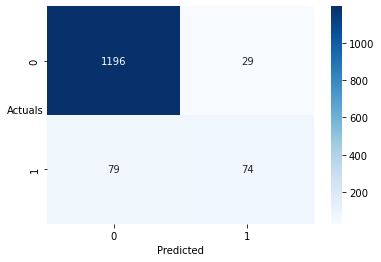

In [90]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [91]:
# Confusion Matrix
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

              precision    recall  f1-score   support

         0.0      0.938     0.976     0.957      1225
         1.0      0.718     0.484     0.578       153

    accuracy                          0.922      1378
   macro avg      0.828     0.730     0.767      1378
weighted avg      0.914     0.922     0.915      1378



In [92]:
# Choosing the optimal Threshold using ROC Curve

from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(train_XY['Default'],y_prob_pred_train)

In [93]:
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.10709566593473616

In [94]:
# Validating on the train set wit revised Threshold

# Prediction on the train set
y_pred=[]
for i in range(0,len(y_prob_pred_train)):
    if np.array(y_prob_pred_train)[i]>0.10709:
        a=1
    else:
        a=0
    y_pred.append(a)

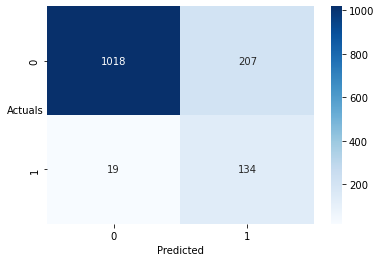

In [95]:
sns.heatmap((metrics.confusion_matrix(train_XY['Default'],y_pred)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [96]:
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

#> Although the precission value has come down, The recall value has improved significantly from 0.48 to 0.87

              precision    recall  f1-score   support

         0.0      0.982     0.831     0.900      1225
         1.0      0.393     0.876     0.543       153

    accuracy                          0.836      1378
   macro avg      0.687     0.853     0.721      1378
weighted avg      0.916     0.836     0.860      1378



#### Validating on the test data

In [97]:
y_prob_pred_test = model33.predict(test_XY)

In [98]:
# Prediction on the test set
y_pred_test=[]
for i in range(0,len(y_prob_pred_test)):
    if np.array(y_prob_pred_test)[i]>0.10709:
        a=1
    else:
        a=0
    y_pred_test.append(a)

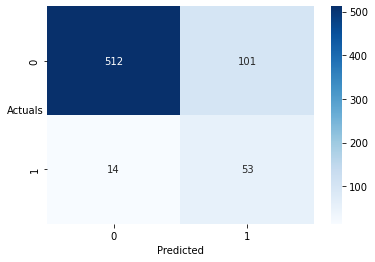

In [99]:
sns.heatmap((metrics.confusion_matrix(test_XY['Default'],y_pred_test)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [100]:
print(metrics.classification_report(test_XY['Default'],y_pred_test, digits=3))

#>The recall obtained in test set is 0.79

              precision    recall  f1-score   support

         0.0      0.973     0.835     0.899       613
         1.0      0.344     0.791     0.480        67

    accuracy                          0.831       680
   macro avg      0.659     0.813     0.689       680
weighted avg      0.911     0.831     0.858       680



In **financial credit risk analysis**, a high recall value and accepting a lower precision value can be a reasonable trade-off:

**Recall (Sensitivity)**: It represents the <u>proportion of actual credit defaults correctly identified</u> by the model. High recall captures a large percentage of potential defaults, reducing missed defaults (false negatives). This helps mitigate losses for the lender.

**Precision**: It represents the proportion of <u>predicted defaults that are actually credit defaults</u>. A lower precision means more false positives, where customers are predicted to default but may not. This conservative approach minimizes the risk of lending to potential defaulters.



    The precission and Recall values in both test and train sets are comparable and hence we can say that we have a fairly good model not showing presence of any overfitting and a Recall score of around 80%.  
    
    VIF has been used to metigate the multicolinearity in the model where as the feature selection has been further improved by using the p-value to identify and eliminate any non-significant features from the model.

**The ROC (Receiver Operating Characteristic) curve** evaluates a classification model's performance by plotting the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) as the classification threshold varies. It helps visualize how well the model distinguishes positive and negative instances.   
**AUC (Area Under the Curve)** summarizes overall performance, with higher values indicating better model performance.

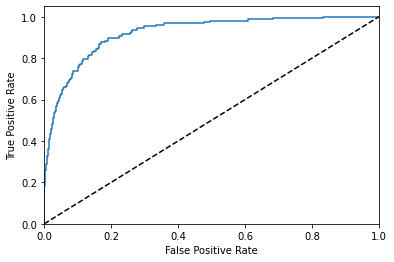

In [101]:
# ROC Curve for model33
y_prob_pred_train = model33.predict(train_XY.drop('Default', axis=1))
fpr, tpr, thresholds = metrics.roc_curve(train_XY['Default'], y_prob_pred_train)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % metrics.roc_auc_score(train_XY['Default'], y_prob_pred_train))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');

In [146]:
# Import the necessary library
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score
y_prob_pred_test = model33.predict(test_XY.drop('Default', axis=1))
roc_auc_score = roc_auc_score(test_XY['Default'], y_prob_pred_test)

# Print the ROC-AUC score
print(f"ROC-AUC Score for model33 on the test set: {roc_auc_score:.2f}")

ROC-AUC Score for model33 on the test set: 0.90


## EDA

EDA will be performed using the significant Predictors only that are identified after VIF and feature selection using p-values.

In [102]:
# Dataset for EDA
df=Company[['Default','_Total_income_to_Total_expense','_Cash_Reinvestment_perc','_Retained_Earnings_to_Total_Assets','_Allocation_rate_per_person','_Accounts_Receivable_Turnover','_Total_expense_to_Assets','_Research_and_development_expense_rate','_Interest_bearing_debt_interest_rate'
]]

In [103]:
df.sample(5)

,Default,_Total_income_to_Total_expense,_Cash_Reinvestment_perc,_Retained_Earnings_to_Total_Assets,_Allocation_rate_per_person,_Accounts_Receivable_Turnover,_Total_expense_to_Assets,_Research_and_development_expense_rate,_Interest_bearing_debt_interest_rate
1839,0,0.00,0.39,0.93,0.02,0.00,0.02,0.00,0.00
1215,0,0.00,0.38,0.94,0.02,0.00,0.02,2260000000.00,0.00
1554,0,0.00,0.39,0.93,0.03,0.00,0.02,0.00,0.00
403,0,0.00,0.40,0.93,0.00,0.00,0.02,0.00,0.00
440,0,0.00,0.39,0.94,0.03,0.00,0.01,2600000000.00,0.00


In [104]:
df.info()

#1. Total 8 Independent variables and 1 response (Default) Column.
#2. All Numeric datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Default                                 2058 non-null   int64  
 1   _Total_income_to_Total_expense          2058 non-null   float64
 2   _Cash_Reinvestment_perc                 2058 non-null   float64
 3   _Retained_Earnings_to_Total_Assets      2058 non-null   float64
 4   _Allocation_rate_per_person             2058 non-null   float64
 5   _Accounts_Receivable_Turnover           2058 non-null   float64
 6   _Total_expense_to_Assets                2058 non-null   float64
 7   _Research_and_development_expense_rate  2058 non-null   float64
 8   _Interest_bearing_debt_interest_rate    2058 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 144.8 KB


In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Default,2058.00,0.11,0.31,0.00,0.00,0.00,0.00,1.00
_Total_income_to_Total_expense,2058.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
_Cash_Reinvestment_perc,2058.00,0.38,0.03,0.03,0.37,0.38,0.39,1.00
_Retained_Earnings_to_Total_Assets,2058.00,0.93,0.03,0.00,0.93,0.94,0.94,0.97
_Allocation_rate_per_person,2058.00,5725558.82,197949961.06,0.00,0.00,0.01,0.02,8280000000.00
_Accounts_Receivable_Turnover,2058.00,41598639.46,504767266.59,0.00,0.00,0.00,0.00,9740000000.00
_Total_expense_to_Assets,2058.00,0.03,0.04,0.00,0.01,0.02,0.04,1.00
_Research_and_development_expense_rate,2058.00,1208634256.56,2144568158.08,0.00,0.00,0.00,1550000000.00,9980000000.00
_Interest_bearing_debt_interest_rate,2058.00,11130223.52,90425949.04,0.00,0.00,0.00,0.00,990000000.00


### Univariate analysis

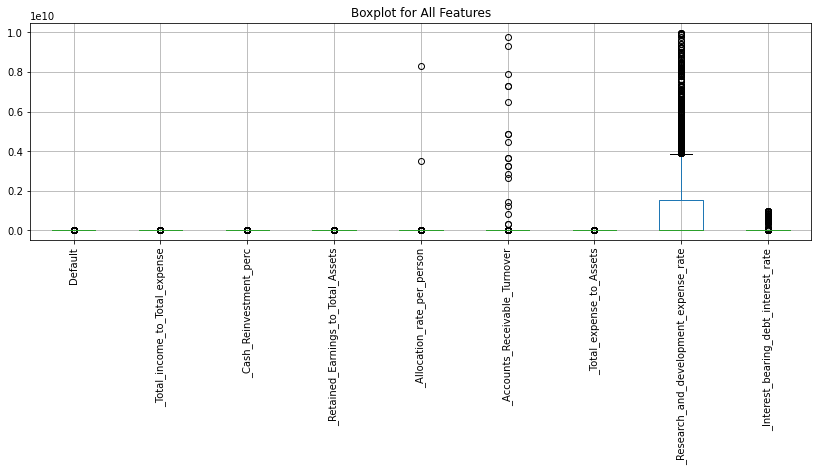

In [106]:
plt.figure(figsize=(14,4));

df.boxplot();
plt.title("Boxplot for All Features")
plt.xticks(rotation=90);

0   0.89
1   0.11
Name: Default, dtype: float64

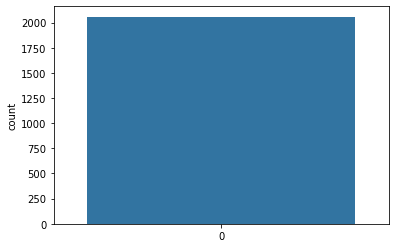

In [107]:
sns.countplot(df['Default']);
display(df.Default.value_counts(normalize=True));

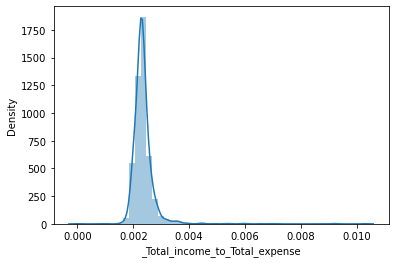

In [108]:
sns.distplot(df['_Total_income_to_Total_expense']);

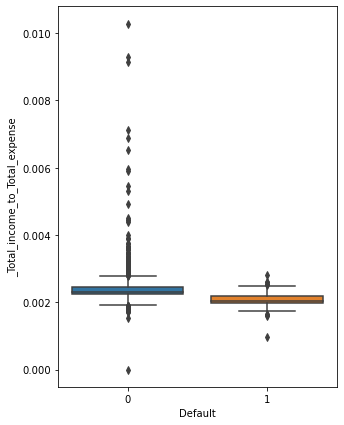

In [110]:
plt.figure(figsize=(5, 7))
sns.boxplot(data=df, x='Default', y='_Total_income_to_Total_expense');

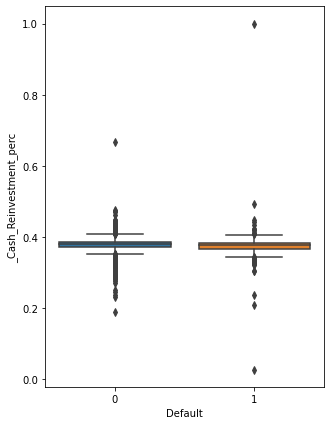

In [112]:
plt.figure(figsize=(5,7))
sns.boxplot(x=df['Default'],y=df['_Cash_Reinvestment_perc']);

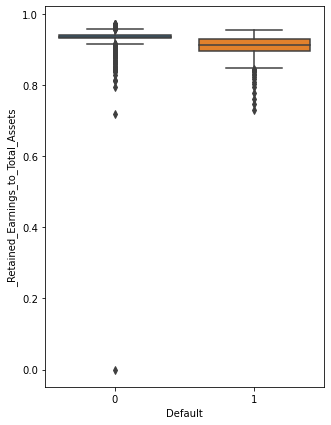

In [113]:
plt.figure(figsize=(5,7))
sns.boxplot(x=df['Default'],y=df['_Retained_Earnings_to_Total_Assets']);

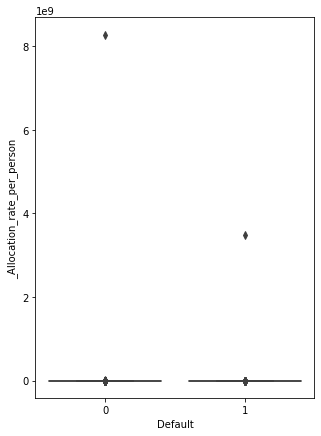

In [114]:
plt.figure(figsize=(5,7))
sns.boxplot(x=df['Default'],y=df['_Allocation_rate_per_person']);

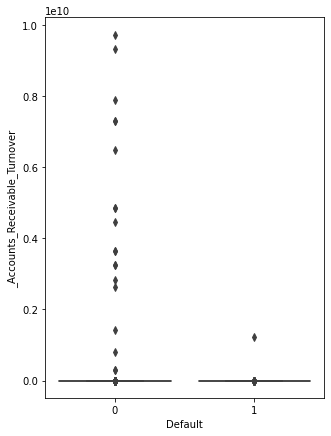

In [115]:
plt.figure(figsize=(5,7))
sns.boxplot(x=df['Default'],y=df['_Accounts_Receivable_Turnover']);

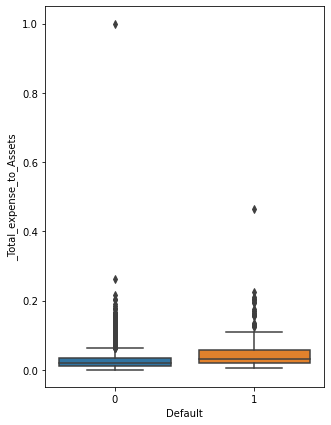

In [116]:
plt.figure(figsize=(5,7))
sns.boxplot(x=df['Default'],y=df['_Total_expense_to_Assets']);

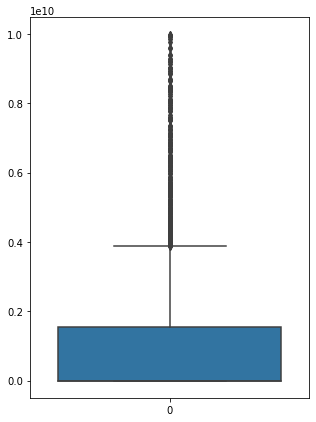

In [117]:
plt.figure(figsize=(5,7))
sns.boxplot(df['_Research_and_development_expense_rate']);

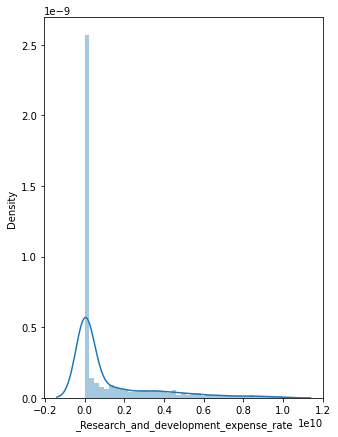

In [118]:
plt.figure(figsize=(5,7))
sns.distplot(df['_Research_and_development_expense_rate']);

### Model-I:  RANDOM FOREST

In [119]:
#1.8) Build a RANDOM FOREST Model on Train dset

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth':[3,5,7],
    'min_samples_leaf':[5,10,15],
    'min_samples_split':[15,30,45],
    'n_estimators':[25,50]
}

rfcl=RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid)


In [120]:
grid_search.fit(X_train, y_train) 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [15, 30, 45],
                         'n_estimators': [25, 50]})

In [121]:
grid_search.best_params_

{'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 15,
 'n_estimators': 25}

In [122]:
best_grid=grid_search.best_estimator_

In [123]:
pred_train_rf=best_grid.predict(X_train)
pred_test_rf=best_grid.predict(X_test)

In [124]:
print(metrics.classification_report(y_train,pred_train_rf))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1225
         1.0       0.95      0.51      0.66       153

    accuracy                           0.94      1378
   macro avg       0.95      0.75      0.82      1378
weighted avg       0.94      0.94      0.93      1378



In [125]:
print(metrics.classification_report(y_test,pred_test_rf))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       613
         1.0       0.62      0.31      0.42        67

    accuracy                           0.91       680
   macro avg       0.77      0.65      0.68       680
weighted avg       0.90      0.91      0.90       680



In [126]:
# Validating on the train set 

# Prediction on the train set
pred_train_rf1=[]
for i in range(0,len(pred_train_rf)):
    if np.array(pred_train_rf)[i]>0.10709:
        a=1
    else:
        a=0
    pred_train_rf1.append(a)

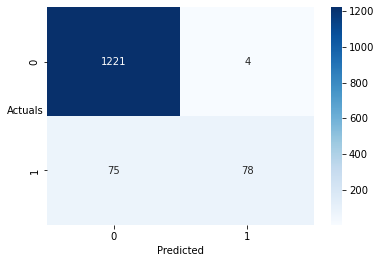

In [127]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_train_rf1)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [128]:
print(metrics.classification_report(y_train,pred_train_rf1))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1225
         1.0       0.95      0.51      0.66       153

    accuracy                           0.94      1378
   macro avg       0.95      0.75      0.82      1378
weighted avg       0.94      0.94      0.93      1378



In [129]:
# Validating on the test set 

# Prediction on the test set
pred_test_rf1=[]
for i in range(0,len(pred_test_rf)):
    if np.array(pred_test_rf)[i]>0.10709:
        a=1
    else:
        a=0
    pred_test_rf1.append(a)

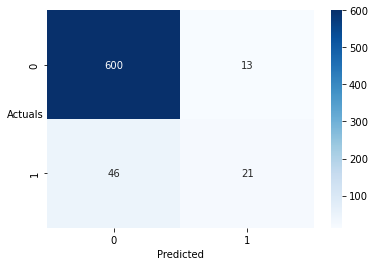

In [130]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_test_rf1)),annot=True,cmap='Blues',fmt=".0f");
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [131]:
print(metrics.classification_report(y_test,pred_test_rf1))

              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       613
         1.0       0.62      0.31      0.42        67

    accuracy                           0.91       680
   macro avg       0.77      0.65      0.68       680
weighted avg       0.90      0.91      0.90       680



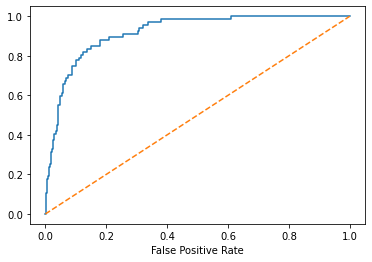

In [132]:
# calculating ROC curve for rfcl1 model
from sklearn.metrics import roc_curve, roc_auc_score

# Compute probabilities of positive class (class 1) for the test set
probs_test = best_grid.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and threshold for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probs_test)

# Compute the area under the ROC curve
roc_auc = roc_auc_score(y_test, probs_test)

# Plot the ROC curve
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate');

### Model-II: Linear Discriminant Analysis (LDA)

In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

In [134]:
LDA = LinearDiscriminantAnalysis()

In [135]:
lda_model=LDA.fit(X_train,y_train)

In [136]:
pred_train_lda = lda_model.predict(X_train)
pred_test_lda = lda_model.predict(X_test)

In [137]:
print(metrics.classification_report(y_train,pred_train_lda))

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      1225
         1.0       0.61      0.52      0.56       153

    accuracy                           0.91      1378
   macro avg       0.78      0.74      0.76      1378
weighted avg       0.90      0.91      0.91      1378



In [138]:
print(metrics.classification_report(y_test,pred_test_lda)) 

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       613
         1.0       0.53      0.63      0.57        67

    accuracy                           0.91       680
   macro avg       0.74      0.78      0.76       680
weighted avg       0.92      0.91      0.91       680



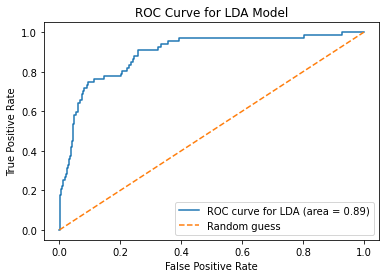

In [139]:
# ROC curve for lda_model
probs_test_lda = lda_model.predict_proba(X_test)[:, 1] # Compute probabilities of positive class (class 1) for the test set
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, probs_test_lda) # Compute the false positive rate, true positive rate, and threshold for the ROC curve
roc_auc_lda = roc_auc_score(y_test, probs_test_lda) # Compute the area under the ROC curve

plt.plot(fpr_lda, tpr_lda, label=f'ROC curve for LDA (area = {roc_auc_lda:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for LDA Model')
plt.legend(loc="lower right")
plt.show()




**Comparison table for model33(logit), rfcl model and lda_model**  
To create a comparison table for the models and provide a summary, we'll gather the relevant performance metrics for each model and present them in a tabular format. We'll include metrics like accuracy, precision, recall, and area under the ROC curve (AUC). We'll assume that "model33" and "rfcl model" refer to the same RandomForestClassifier model, which was defined earlier in the code.

In [143]:
# Comparison table for rfcl model and lda_model

import pandas as pd
from sklearn import metrics

# Compute performance metrics for the rfcl model
pred_train_rfcl = best_grid.predict(X_train)
pred_test_rfcl = best_grid.predict(X_test)

train_accuracy_rfcl = metrics.accuracy_score(y_train, pred_train_rfcl)
test_accuracy_rfcl = metrics.accuracy_score(y_test, pred_test_rfcl)

train_precision_rfcl = metrics.precision_score(y_train, pred_train_rfcl)
test_precision_rfcl = metrics.precision_score(y_test, pred_test_rfcl)

train_recall_rfcl = metrics.recall_score(y_train, pred_train_rfcl)
test_recall_rfcl = metrics.recall_score(y_test, pred_test_rfcl)

# Create a dictionary to store the performance metrics for the models
model_metrics = {
    'Model': ['rfcl', 'LDA'],
    'Train Accuracy': [train_accuracy_rfcl, metrics.accuracy_score(y_train, pred_train_lda)],
    'Test Accuracy': [test_accuracy_rfcl, metrics.accuracy_score(y_test, pred_test_lda)],
    'Train Precision': [train_precision_rfcl, metrics.precision_score(y_train, pred_train_lda)],
    'Test Precision': [test_precision_rfcl, metrics.precision_score(y_test, pred_test_lda)],
    'Train Recall': [train_recall_rfcl, metrics.recall_score(y_train, pred_train_lda)],
    'Test Recall': [test_recall_rfcl, metrics.recall_score(y_test, pred_test_lda)],
    'ROC AUC': [roc_auc, roc_auc_lda]
}

# Create a DataFrame from the model_metrics dictionary
comparison_table = pd.DataFrame(model_metrics)


In [144]:
# Display the comparison table in a well formatted table format
from tabulate import tabulate

# Define a function to display the comparison table in a well-formatted table format
def display_comparison_table(dataframe):
    table_format = "grid"  # You can change this to "fancy_grid" or "pretty" for different table styles
    print(tabulate(dataframe, headers='keys', tablefmt=table_format))

# Call the function with the comparison_table DataFrame
display_comparison_table(comparison_table)

+----+---------+------------------+-----------------+-------------------+------------------+----------------+---------------+-----------+
|    | Model   |   Train Accuracy |   Test Accuracy |   Train Precision |   Test Precision |   Train Recall |   Test Recall |   ROC AUC |
+====+=========+==================+=================+===================+==================+================+===============+===========+
|  0 | rfcl    |         0.942671 |        0.913235 |          0.95122  |         0.617647 |       0.509804 |      0.313433 |  0.917971 |
+----+---------+------------------+-----------------+-------------------+------------------+----------------+---------------+-----------+
|  1 | LDA     |         0.910015 |        0.907353 |          0.610687 |         0.525    |       0.522876 |      0.626866 |  0.892649 |
+----+---------+------------------+-----------------+-------------------+------------------+----------------+---------------+-----------+


In [96]:
## Again considering the model33 model performance also for comparison - 
print(metrics.classification_report(train_XY['Default'],y_pred, digits=3))

#> Although the precission value has come down, The recall value has improved significantly from 0.48 to 0.87

              precision    recall  f1-score   support

         0.0      0.982     0.831     0.900      1225
         1.0      0.393     0.876     0.543       153

    accuracy                          0.836      1378
   macro avg      0.687     0.853     0.721      1378
weighted avg      0.916     0.836     0.860      1378



In [146]:
# Import the necessary library
from sklearn.metrics import roc_auc_score

# Calculate the ROC-AUC score
y_prob_pred_test = model33.predict(test_XY.drop('Default', axis=1))
roc_auc_score = roc_auc_score(test_XY['Default'], y_prob_pred_test)

# Print the ROC-AUC score
print(f"ROC-AUC Score for model33 on the test set: {roc_auc_score:.2f}")

ROC-AUC Score for model33 on the test set: 0.90


##### Comparison table for model33, rfcl model and lda_model
ValueError: Classification metrics can't handle a mix of binary and continuous targets

Explanation:

The error is occurring because the metrics.accuracy_score function is being used to compute accuracy, precision, and recall scores for the model33 classifier. However, the model33 classifier is likely a continuous output model (e.g., regression model) that is returning continuous predictions, whereas the metrics.accuracy_score function expects binary or multiclass classification predictions.

Solution:

To fix the problem, you need to ensure that the model33 classifier is a binary classifier (e.g., logistic regression, support vector machine with binary labels, etc.) that can produce binary predictions (0 or 1) instead of continuous values.

If the intention is to perform binary classification, you should modify the model or use an appropriate classifier for binary tasks. If the intention is to perform regression (continuous output), then you should use appropriate regression metrics instead of classification metrics (e.g., mean squared error, mean absolute error).

Please review the model33 classifier to ensure it is a binary classifier, and if needed, update it accordingly. Additionally, make sure to select the appropriate evaluation metrics based on the nature of your problem (classification or regression).

## FINAL SUMMARY

The **random forest classifier (rfcl)** outperforms Linear Discriminant Analysis (LDA) in several metrics, achieving higher accuracy, precision, and ROC AUC on both training and test data.   
However, **LDA** shows better performance in identifying potential defaulters based on higher test recall, making it more effective at correctly classifying companies at risk of default (Hence preferred for current case)   

    The choice between the two models may depend on specific business objectives, the importance of precision versus recall in financial risk analysis, & the trade-off between overall performance and correctly identifying potential defaulters.